In [212]:
#code to read all the apk's in the dir
from os import listdir
from os.path import isfile, join


apk_path = 'APKs'
#apk_path = '6test'
#sesName = apk_path + ".ag"
useSes = False

apks = []
for f in listdir(apk_path):
    if isfile(join(apk_path, f)) and f.endswith(".apk"):
        full = './' + apk_path + '/' + f
        apks.append(full)
        print("added: " + full)  
        

#apks = [f for f in listdir(apk_path) if (isfile(join(apk_path, f)) and f.endswith(".apk"))]

print("number apk's found: ", len(apks))

added: ./APKs/a.a.hikidashi.apk
added: ./APKs/a.akakao.bong_ment.apk
added: ./APKs/a.b.wassim.guide.apk
added: ./APKs/a.duMobile.srv.apk
added: ./APKs/a2works.com.br.battery.apk
added: ./APKs/a2works.com.br.ipva_ba.apk
added: ./APKs/a2works.com.br.ipva_pr.apk
added: ./APKs/a2z.Mobile.Event3478.apk
added: ./APKs/a2z.Mobile.Event3649.apk
added: ./APKs/a2z.Mobile.Event4086.apk
added: ./APKs/a2z.Mobile.Event4208.apk
added: ./APKs/aave.lifebarometer.apk
added: ./APKs/ab.gamming.meteoriteWash.apk
added: ./APKs/ab4tec.com.chronometerandtimer.apk
added: ./APKs/abcom.com.timeconverter.apk
added: ./APKs/abcom.istom.lovelywallpaper.apk
added: ./APKs/abd.abdallah.igli5.apk
added: ./APKs/abd.abdallah.islam.youtube.apk
added: ./APKs/abd.abdallah.uptodate.youtube.apk
added: ./APKs/abhishek.arcdroid.tenth.apk
added: ./APKs/aboutdharma.com.apk
added: ./APKs/abstractionvideolwp.led.com.apk
added: ./APKs/ac.omonoia.nic.apk
added: ./APKs/ac.rj.staff.apk
added: ./APKs/ac.robinson.chameleonnotifier.apk
adde

In [213]:
#code to cache the analysis of the apk's (if this is enabled)
from androguard import misc
from androguard import session
from os import listdir
from os.path import isfile, join

if useSes:
    s = misc.get_default_session()
    for apk in apks:    
        digest = s.add(apk)
        print("analysed: " + apk)
else:
    print("not using session analysis cache");


not using session analysis cache


In [214]:
# code that uses get_xref_from() to see from where the code is called 
from androguard.core.analysis.analysis import ExternalMethod

def analyseMethod(ma, level=0):    
    #print(repr(ma))
    for pca, pm, offset in ma.get_xref_from(): #(ClassAnalysis, EncodedMethod or ExternalMethod, int
        print("L{} Call from {} => {}:{}".format(level, pca.name, pm.name, offset))
        

for apk in apks:
    print("*** " + apk )
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
        
    #for ma in dx.find_methods(classname="Landroid/webkit/WebSettings;", methodname='setUserAgentString'):
    for ma in dx.find_methods(methodname='setUserAgentString'):
        analyseMethod(ma)
    

    

*** ./APKs/a.a.hikidashi.apk
L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/a.akakao.bong_ment.apk
*** ./APKs/a.b.wassim.guide.apk
L0 Call from Lcom/google/android/gms/internal/zzir; => zza:8
*** ./APKs/a.duMobile.srv.apk
*** ./APKs/a2works.com.br.battery.apk
L0 Call from Lcom/google/android/gms/internal/ks; => a:8
*** ./APKs/a2works.com.br.ipva_ba.apk
L0 Call from Lcom/google/android/gms/internal/wy; => <init>:208
*** ./APKs/a2works.com.br.ipva_pr.apk
L0 Call from Lcom/google/android/gms/internal/ks; => a:8
*** ./APKs/a2z.Mobile.Event3478.apk
*** ./APKs/a2z.Mobile.Event3649.apk
*** ./APKs/a2z.Mobile.Event4086.apk
*** ./APKs/a2z.Mobile.Event4208.apk
*** ./APKs/aave.lifebarometer.apk
L0 Call from Lcom/google/android/gms/internal/gi; => a:8
*** ./APKs/ab.gamming.meteoriteWash.apk
*** ./APKs/ab4tec.com.chronometerandtimer.apk
L0 Call from Lcom/google/android/gms/internal/zzhl; => zza:8
*** ./APKs/abcom.com.timeconverter.apk
L0 Call from Lcom/google/android/gms/internal/zzir;

Requested API Level could not be found, using 19 instead


L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/aesthetic.developers.flyingbirdy.apk
L0 Call from Lcom/google/android/gms/internal/cn; => a:8
*** ./APKs/afd.app.ansaar.afd.apk
L0 Call from Lcom/google/android/gms/internal/gi; => a:8
*** ./APKs/afk.passpal.free.apk
L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/afkari.io.kalimathobei.apk
L0 Call from Lcom/google/android/gms/internal/zzid; => zza:8
*** ./APKs/afzkl.development.ShoppingList.apk
L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/ageagebatsugame.taro.apk
L0 Call from Lcom/google/android/gms/internal/ep; => a:8
*** ./APKs/agency.contra.apps.kpmg.kpmgglobalevent.apk
L0 Call from Lorg/xwalk/core/internal/XWalkSettingsBridge; => setUserAgentStringSuper:20
L0 Call from Lorg/xwalk/core/internal/XWalkViewInternal; => setUserAgentString:20
L0 Call from Lorg/xwalk/core/internal/XWalkSettingsBridge; => setUserAgentStringSuper:8
L0 Call from Lorg/xwalk/core/internal/XWalkViewBridge; => setUserAgent

Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/air.air.lido.LidoMobile.apk
*** ./APKs/air.air.lyl.ThreeKingdomsFT.apk
L0 Call from Lnet/youmi/android/b/a/j/a/g; => setUserAgentString:8
*** ./APKs/air.air.monsterbraingames.cutit.apk
*** ./APKs/air.air.Sokoban3D.apk
*** ./APKs/air.AIRMapViewer.apk
*** ./APKs/air.Airshooting.apk
L0 Call from Lcom/google/android/gms/internal/zzid; => zza:8
*** ./APKs/air.ajazgames.ajaztreasurehunt2.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ajazgames.babysnailescape.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ajazgames.colorsquareescape.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.AJAZGAMES.escapeabandonedgreyshades.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ajazgames.escapegamesultan.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ajazgames.escapekindnessthanksgiving.apk
L0 Call from Lco

Requested API Level could not be found, using 10 instead


*** ./APKs/air.app.mmstudio.mmvisual.todysbabybook.apk
*** ./APKs/air.apps.NewsEnterprise.canadanewspapers.apk
*** ./APKs/air.apps.NewsEnterprise.deutschezeitungen.apk
*** ./APKs/air.apps.NewsEnterprise.gazeteler.apk
*** ./APKs/air.apps.NewsEnterprise.indianewspapers.apk
*** ./APKs/air.apps.NewsEnterprise.lesjournauxenfrancais.apk
*** ./APKs/air.apps.NewsEnterprise.mediatakeout.apk
*** ./APKs/air.apps.NewsEnterprise.surinamenieuws.apk
*** ./APKs/air.apps.NewsEnterprise.voetbalnieuws.apk
*** ./APKs/air.ArabicLetterBox.apk


Requested API Level could not be found, using 10 instead


*** ./APKs/air.Archerfree.apk
L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/air.Astro.apk
*** ./APKs/air.atasaati.apk
*** ./APKs/air.AThanksgivingToRemember.apk


Requested API Level could not be found, using 19 instead


*** ./APKs/air.Autism.Things.apk
*** ./APKs/air.AvmGames.MapleHouseEscape.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.BabyBearSurgerySimulator.apk
L0 Call from Lcom/google/android/gms/internal/zzid; => zza:8
*** ./APKs/air.BabyCleaningDay2.apk
L0 Call from Lcom/google/android/gms/internal/fk; => a:8
*** ./APKs/air.babyemmachristmasdressup.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/air.babyshapes.apk
*** ./APKs/air.BadjaoGirl.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.BasketballHustleForCel.apk
*** ./APKs/air.BeautyTipsinTamil.apk
L0 Call from Lcom/google/android/gms/internal/zzir; => zza:8
*** ./APKs/air.BestEscape82WaterPool.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.bg.teracomm.vivablitz.apk
*** ./APKs/air.BJC.apk
L0 Call from Lcom/google/android/gms/internal/zzir; => zza:8
*** ./APKs/air.BlackjackCity.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.BodyAtlas.apk
*** ./APKs/air.br.com.buracojustificadomano.mobile.apk
L0 Call from Lcom/google/android/gms/internal/zzir; => zza:8
*** ./APKs/air.br.com.cc2002.tablet.free.A2013.apk
*** ./APKs/air.br.com.ciss.mobile.vendas.android.apk
*** ./APKs/air.br.com.epagri.ciram.apk
*** ./APKs/air.br.com.helme.bitbitrobotandroid.apk
L0 Call from Lc/m/x/a/am3/fd; => a:8
*** 

Requested API Level could not be found, using 19 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ChaletGrandCerfEscape.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.charmudex.apk
*** ./APKs/air.CheerfulGirlMatching.apk
L0 Call from Lcom/google/android/gms/internal/zzid; => zza:8
*** ./APKs/air.Chemical_Place_Escape.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.ChiralCube.apk
L0 Call from Lcom/google/android/gms/internal/cv; => a:8
*** ./APKs/air.Christmascoloringbook3.apk
L0 Call from Lcom/google/android/gms/internal/cv; => a:8
*** ./APKs/air.ChristmasPuddingCakePops.apk
L0 Call from Lcom/google/android/gms/internal/fk; => a:8
*** ./APKs/air.cindycakemakerlite.apk
L0 Call from Lcom/google/android/gms/internal/cv; => a:8
*** ./APKs/air.co.yapps.ezan.apk
L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/air.com.abecedaire.JapaneseBrush.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/ads/util/AdUtil; => a:32
*** ./APKs/air.com.absolutist.match3puzzle.bubblezbubbledefence.apk
*** ./APKs/air.com.aetrex.aetrexretailapp.apk
*** ./APKs/air.com.alchemiagames.offside.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/cv; => a:8
*** ./APKs/air.com.alibabacave.CMemory2.apk
*** ./APKs/air.com.amazingzhus.amazingzhus.apk
*** ./APKs/air.com.ami.agada.apk
*** ./APKs/air.com.amihanya.Pray.apk
*** ./APKs/air.com.aminocookinchklo.selasaharablila.apk
L0 Call from Lcom/google/android/gms/internal/zzir; => zza:8
*** ./APKs/air.com.animatedsoftware.PavlovsDog.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.com.applaudsolutions.emp.EmployeeCenterMobile.apk
*** ./APKs/air.com.applauz.brickpic.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.com.applauz.drizzyviews.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.com.applauz.legominifigures.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.com.applauz.wutangme.apk


Requested API Level could not be found, using 10 instead


L0 Call from Lcom/google/android/gms/internal/dq; => a:8
*** ./APKs/air.com.apptaught.MEDpro.apk
*** ./APKs/air.com.apptaught.realestateTrial.apk
*** ./APKs/air.com.aquariumdeathstickman.apk
L0 Call from Lcom/google/android/gms/internal/dq; => a:8


In [215]:
#code using the get_call_graph() function from the androguard API
from networkx import nx
from networkx import MultiDiGraph
import matplotlib.pyplot as plt

 
cnt = 0
for apk in apks:
    cnt+=1
    if(useSes): 
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)        
        
    cg = dx.get_call_graph(methodname='setUserAgentString')    
    cg.name = apk
    print(nx.info(cg) + "\n") 
 

Name: ./APKs/a.a.hikidashi.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a.akakao.bong_ment.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/a.b.wassim.guide.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a.duMobile.srv.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/a2works.com.br.battery.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a2works.com.br.ipva_ba.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a2works.com.br.ipva_pr.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a2z.Mobile.Event3478.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Requested API Level could not be found, using 19 instead


Name: ./APKs/aerostone.bigear.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/aesthetic.developers.flyingbirdy.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/afd.app.ansaar.afd.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/afk.passpal.free.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/afkari.io.kalimathobei.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/afzkl.development.ShoppingList.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/ageagebatsugame.taro.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average 

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.air.it.aquacode.memory.AquaMemory.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.air.lido.LidoMobile.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.air.lyl.ThreeKingdomsFT.apk
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667

Name: ./APKs/air.air.monsterbraingames.cutit.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.air.Sokoban3D.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.AIRMapViewer.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.Airshooting.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.ajazgames.ajaztreasurehunt2.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Nam

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.animations.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.app.mmstudio.mmvisual.todysbabybook.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.canadanewspapers.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.deutschezeitungen.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.gazeteler.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.indianewspapers.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.lesjournauxenfrancais.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.mediatakeout.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsEnterprise.surinamenieuws.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.apps.NewsE

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.ArabicLetterBox.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.Archerfree.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.Astro.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.atasaati.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0




Requested API Level could not be found, using 19 instead


Name: ./APKs/air.AThanksgivingToRemember.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.Autism.Things.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.AvmGames.MapleHouseEscape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.BabyBearSurgerySimulator.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.BabyCleaningDay2.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.babyemmachristmasdressup.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.babyshapes.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.BadjaoGirl.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.BasketballHustleForCel.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.BeautyTipsinTamil.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.BestEscape82WaterPool.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.bg.teracomm.vivablitz.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.BJC.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out de

Requested API Level could not be found, using 19 instead


Name: ./APKs/air.cellphoneescape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.ChaletGrandCerfEscape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.charmudex.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.CheerfulGirlMatching.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.Chemical_Place_Escape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.ChiralCube.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.Christmascoloringbook3.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/a

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.abecedaire.JapaneseBrush.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.com.absolutist.match3puzzle.bubblezbubbledefence.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.aetrex.aetrexretailapp.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0




Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.alchemiagames.offside.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.com.alibabacave.CMemory2.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.amazingzhus.amazingzhus.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.ami.agada.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.amihanya.Pray.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.aminocookinchklo.selasaharablila.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.animatedsoftware.PavlovsDog.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.com.applaudsolutions.emp.EmployeeCenterMobile.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0




Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.brickpic.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.drizzyviews.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.legominifigures.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.wutangme.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000

Name: ./APKs/air.com.apptaught.MEDpro.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.apptaught.realestateTrial.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0


Name: ./APKs/air.com.aquariumdeathstickman.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000



Name: ./APKs/a.a.hikidashi.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/a.akakao.bong_ment.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/a.b.wassim.guide.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/a.duMobile.srv.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/a2works.com.br.battery.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/a2works.com.br.ipva_ba.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/a2works.com.br.ipva_pr.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/a2z.Mobile.Event3478.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name:

C:\Users\gerard\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Name: ./APKs/aboutdharma.com.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/abstractionvideolwp.led.com.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/ac.omonoia.nic.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/ac.rj.staff.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/ac.robinson.chameleonnotifier.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/ac.robinson.mediaphone.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/ac.robinson.mediatablet.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/acne.blogtreat.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/acquadinepi.erioni.al.apk
Type: DiGraph


Requested API Level could not be found, using 19 instead


Name: ./APKs/aerostone.bigear.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/aesthetic.developers.flyingbirdy.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/afd.app.ansaar.afd.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/afk.passpal.free.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/afkari.io.kalimathobei.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/afzkl.development.ShoppingList.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/ageagebatsugame.taro.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in deg

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.air.it.aquacode.memory.AquaMemory.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.air.lido.LidoMobile.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.air.lyl.ThreeKingdomsFT.apk
Type: DiGraph
Number of nodes: 3
Number of edges: 2
Average in degree:   0.6667
Average out degree:   0.6667
Name: ./APKs/air.air.monsterbraingames.cutit.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.air.Sokoban3D.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.AIRMapViewer.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.Airshooting.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.ajazgames.ajaztreasurehunt2.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APK

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.animations.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.app.mmstudio.mmvisual.todysbabybook.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.canadanewspapers.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.deutschezeitungen.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.gazeteler.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.indianewspapers.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.lesjournauxenfrancais.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.mediatakeout.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise.surinamenieuws.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.apps.NewsEnterprise

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.ArabicLetterBox.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.Archerfree.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.Astro.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.atasaati.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0



Requested API Level could not be found, using 19 instead


Name: ./APKs/air.AThanksgivingToRemember.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.Autism.Things.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.AvmGames.MapleHouseEscape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.BabyBearSurgerySimulator.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.BabyCleaningDay2.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


Requested API Level could not be found, using 10 instead


Name: ./APKs/air.babyemmachristmasdressup.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.babyshapes.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.BadjaoGirl.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.BasketballHustleForCel.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.BeautyTipsinTamil.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.BestEscape82WaterPool.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.bg.teracomm.vivablitz.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.BJC.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:  

Requested API Level could not be found, using 19 instead


Name: ./APKs/air.cellphoneescape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.ChaletGrandCerfEscape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.charmudex.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.CheerfulGirlMatching.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.Chemical_Place_Escape.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.ChiralCube.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.Christmascoloringbook3.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.Chri

Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.abecedaire.JapaneseBrush.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.com.absolutist.match3puzzle.bubblezbubbledefence.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.aetrex.aetrexretailapp.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.alchemiagames.offside.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.com.alibabacave.CMemory2.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.amazingzhus.amazingzhus.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.ami.agada.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.amihanya.Pray.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.aminocookinchklo.selasaharablila.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.animatedsoftware.PavlovsDog.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.com.applaudsolutions.emp.EmployeeCenterMobile.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0



Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.brickpic.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.drizzyviews.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.legominifigures.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


Requested API Level could not be found, using 10 instead


Name: ./APKs/air.com.applauz.wutangme.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000
Name: ./APKs/air.com.apptaught.MEDpro.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.apptaught.realestateTrial.apk
Type: DiGraph
Number of nodes: 0
Number of edges: 0

Name: ./APKs/air.com.aquariumdeathstickman.apk
Type: DiGraph
Number of nodes: 1
Number of edges: 0
Average in degree:   0.0000
Average out degree:   0.0000


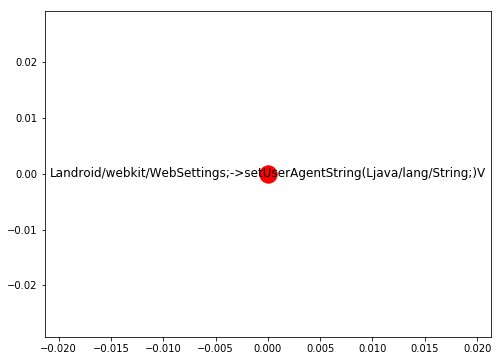

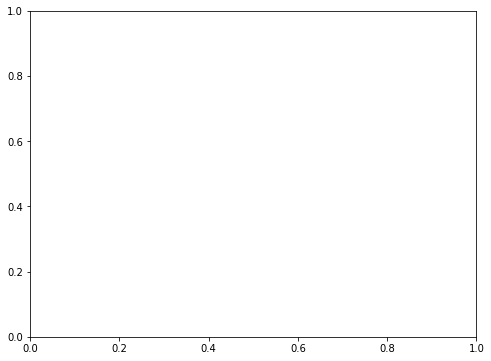

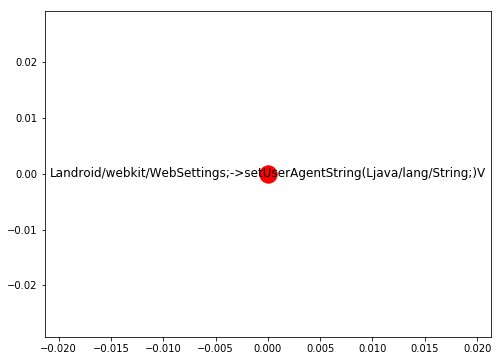

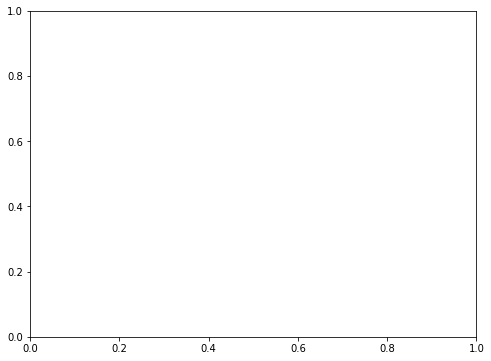

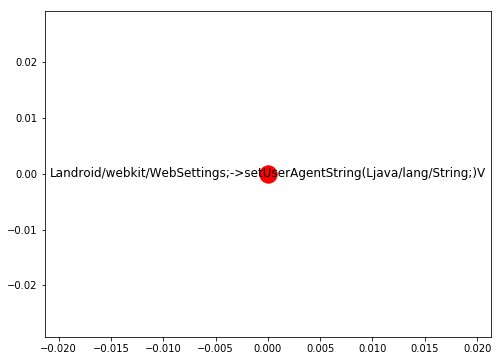

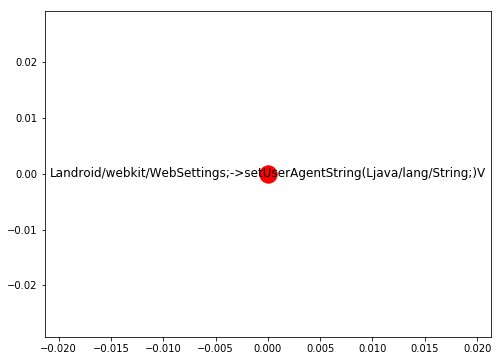

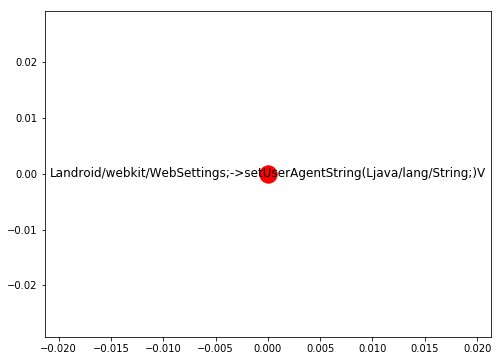

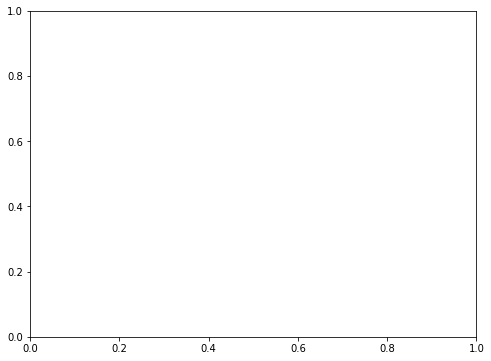

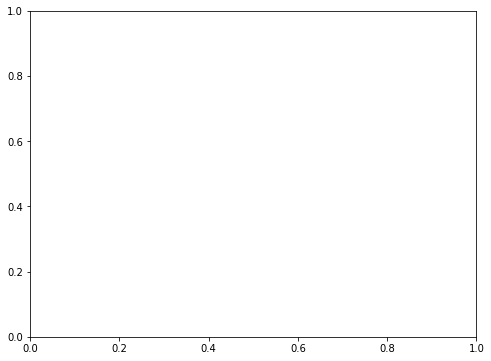

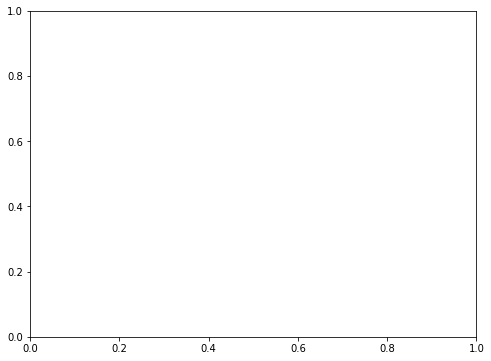

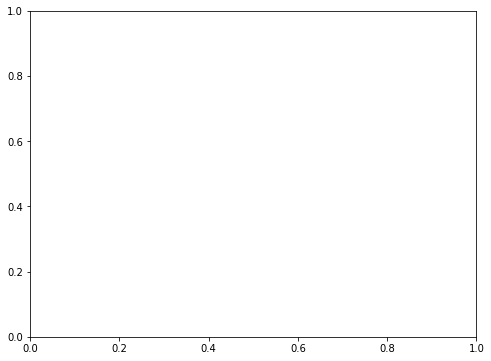

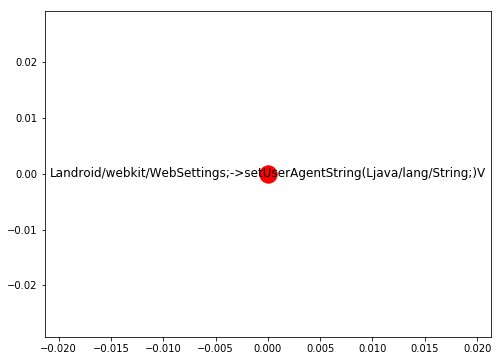

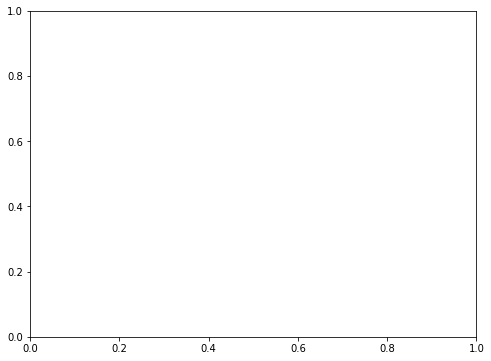

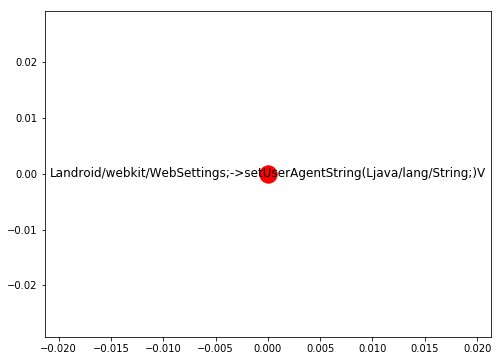

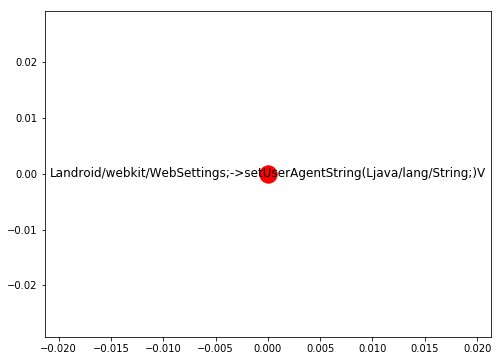

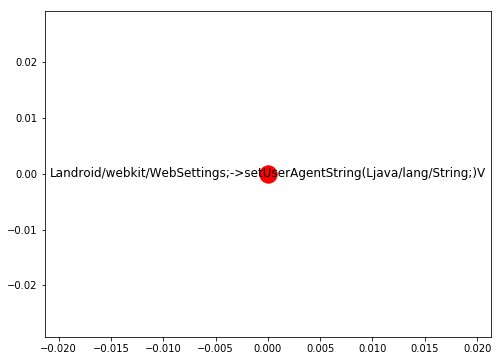

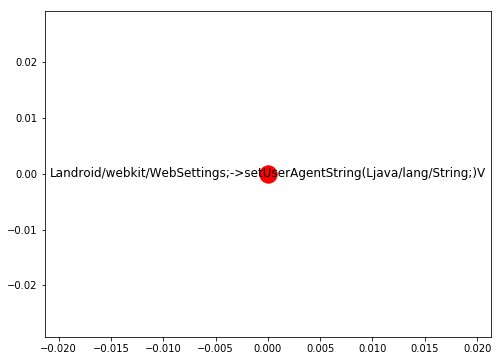

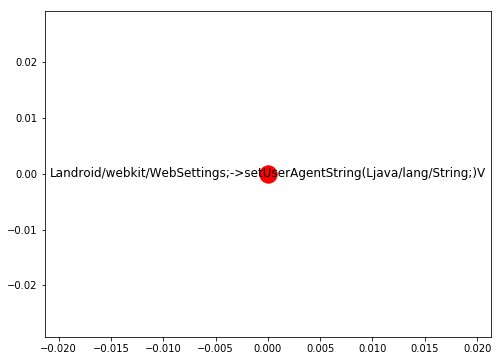

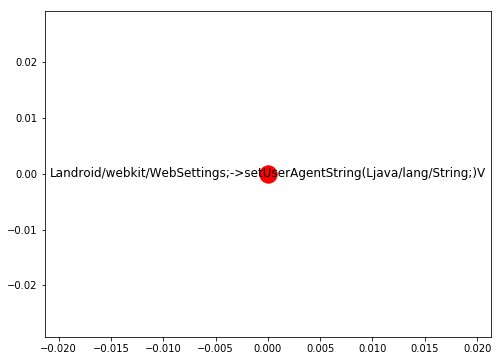

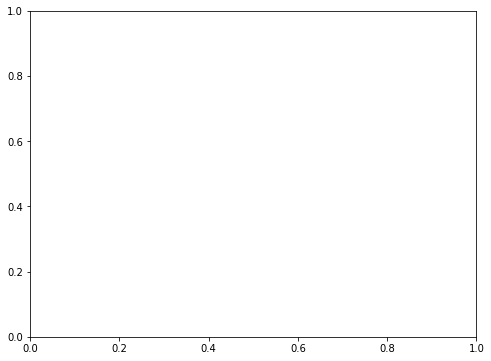

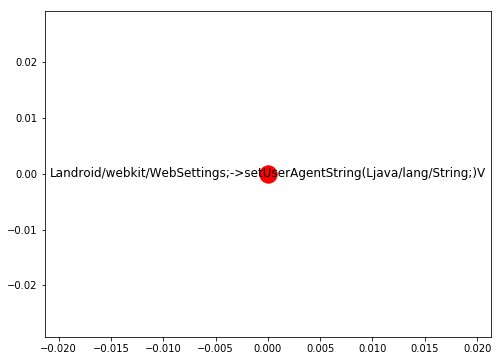

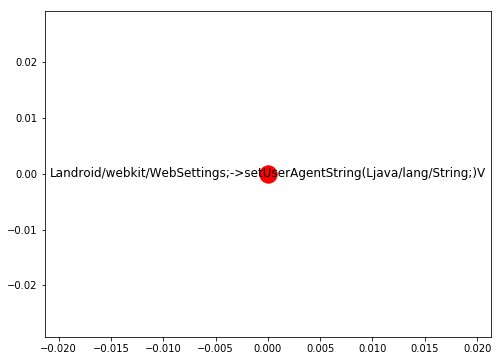

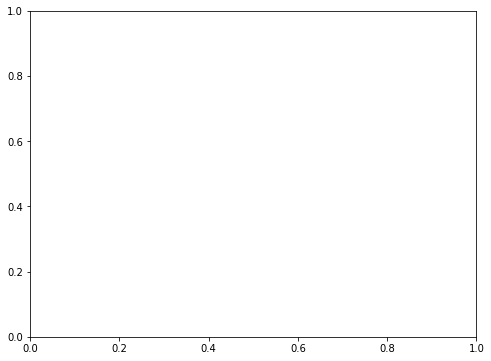

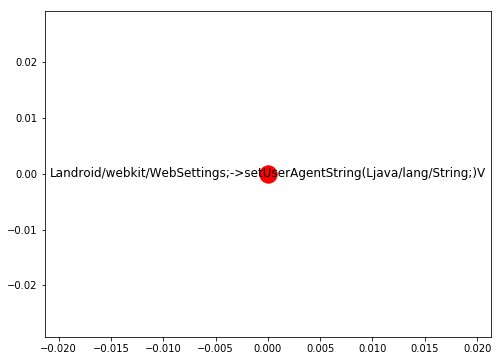

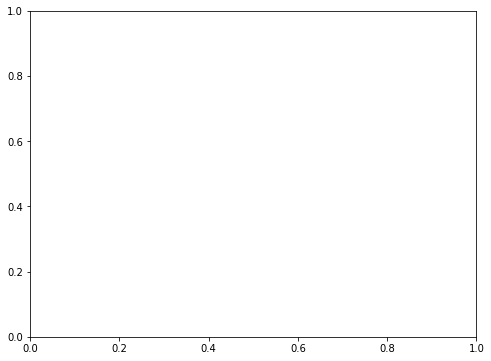

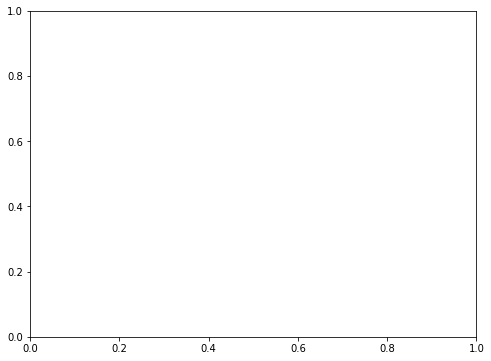

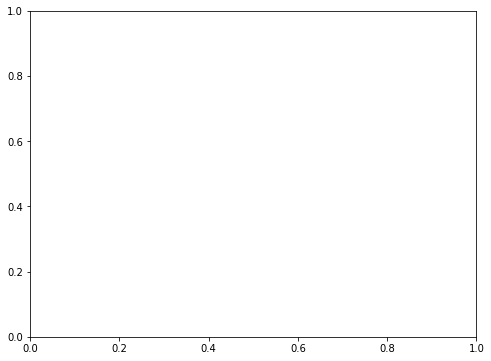

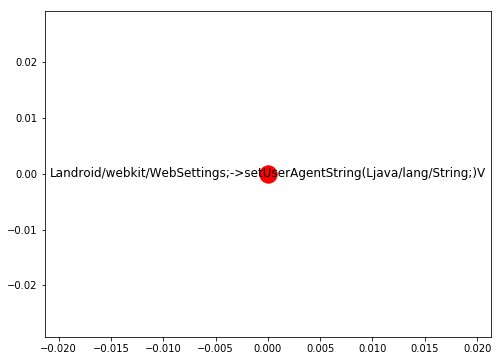

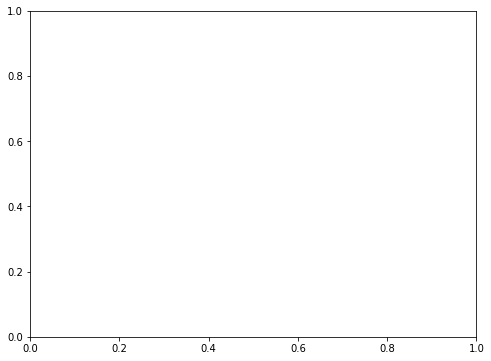

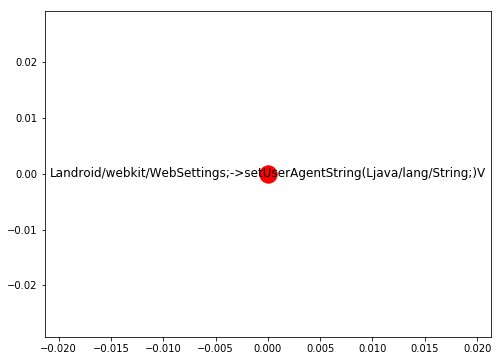

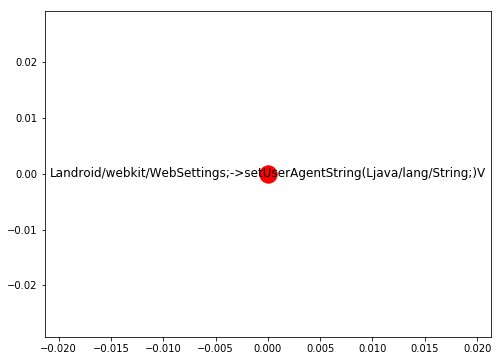

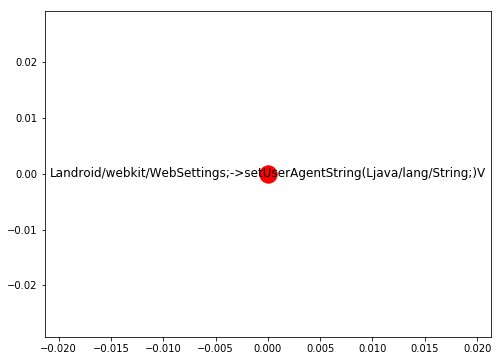

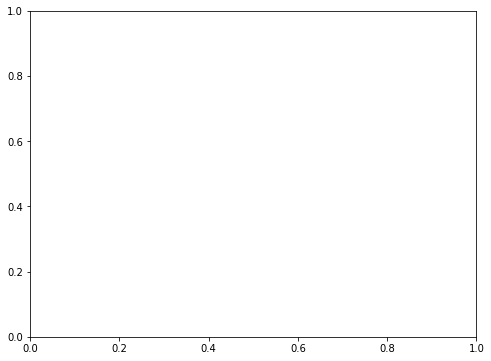

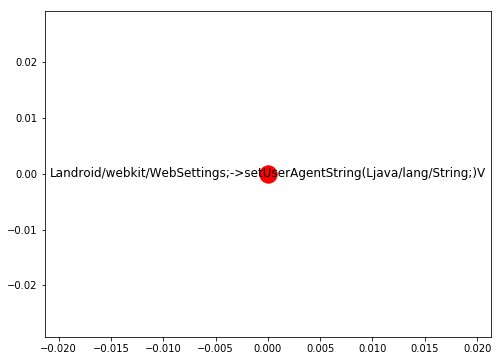

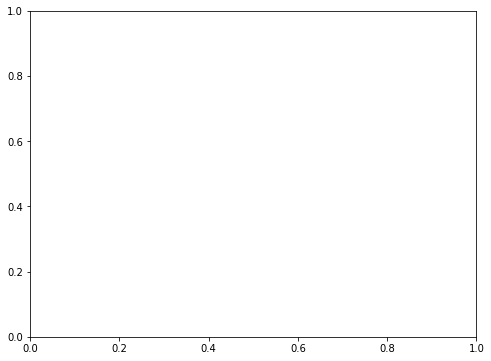

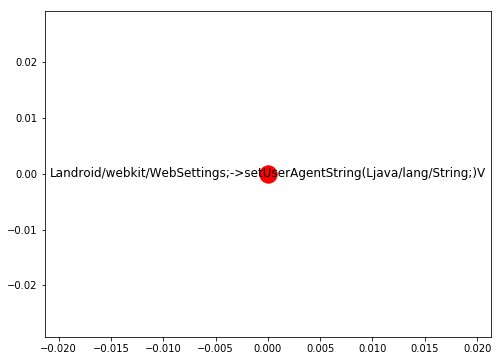

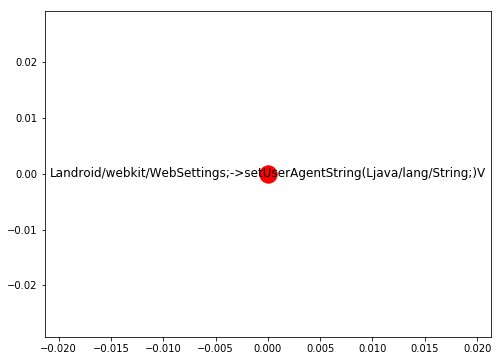

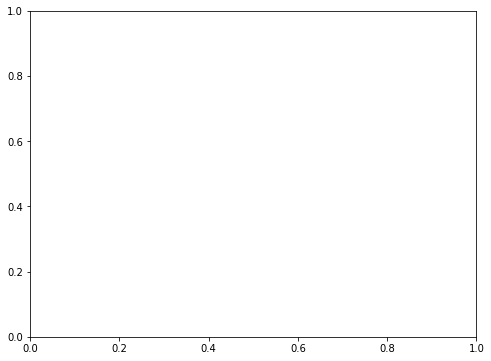

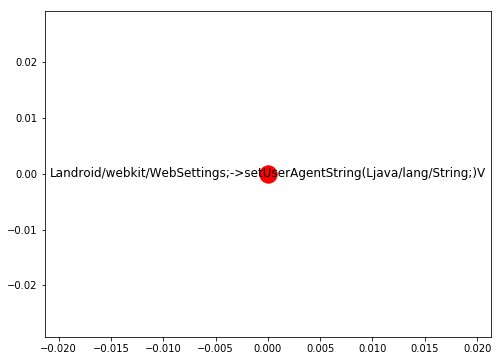

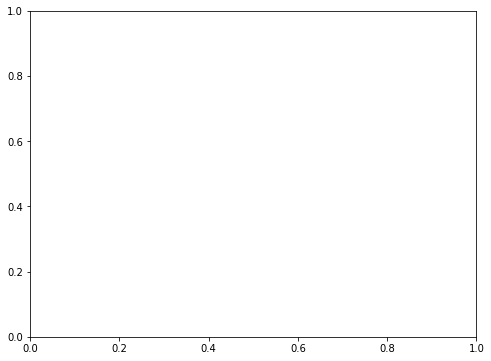

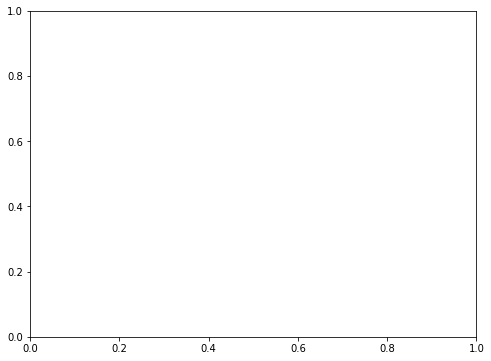

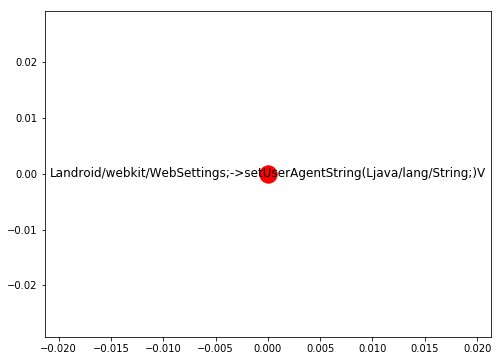

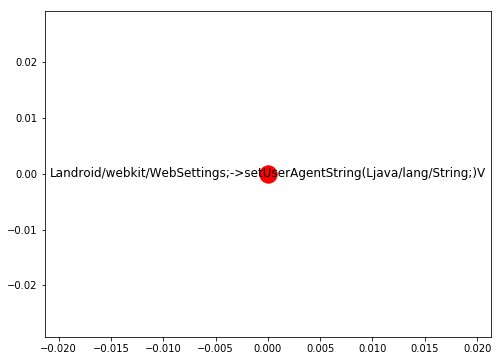

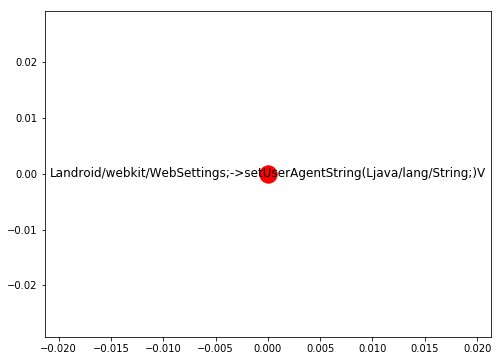

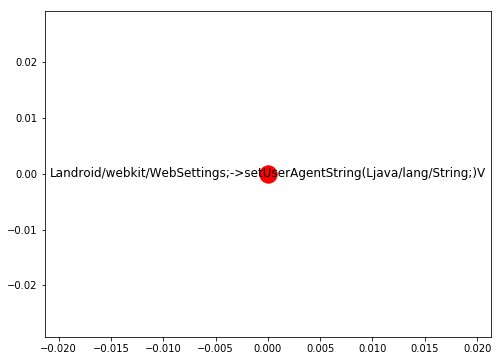

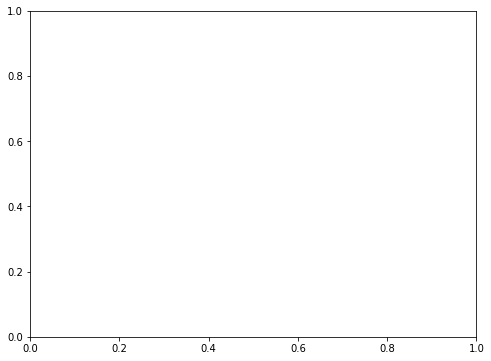

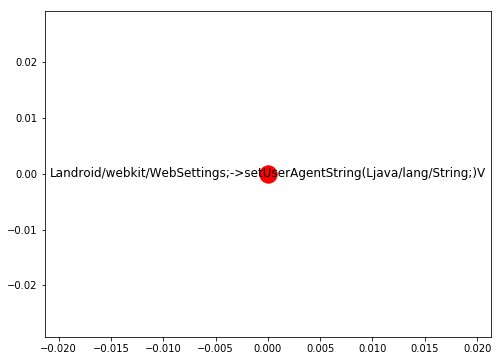

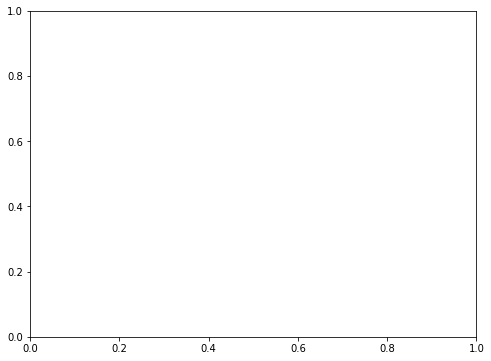

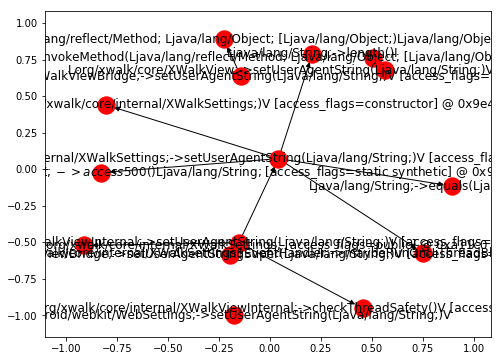

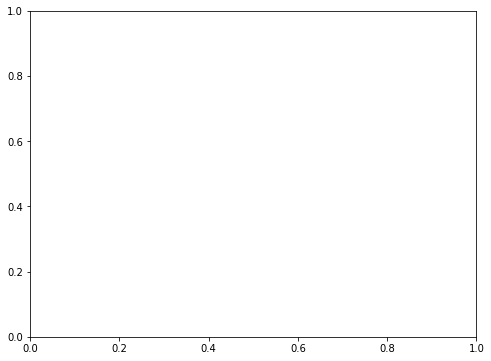

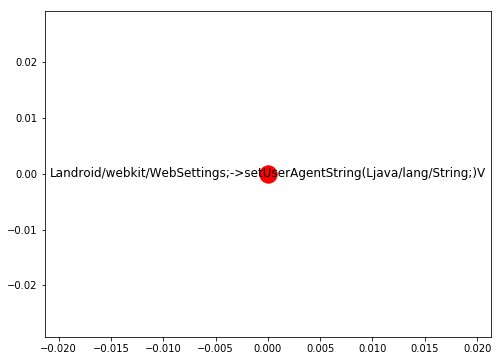

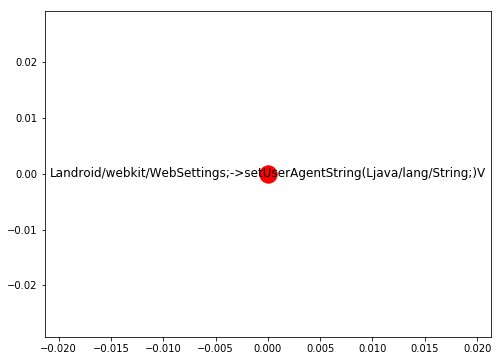

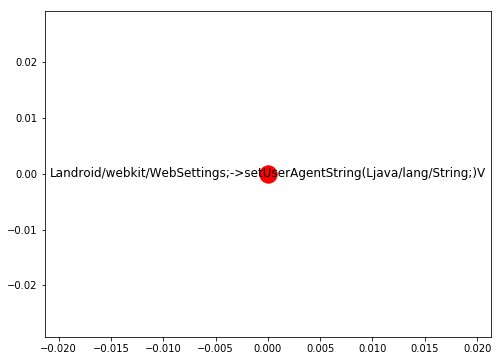

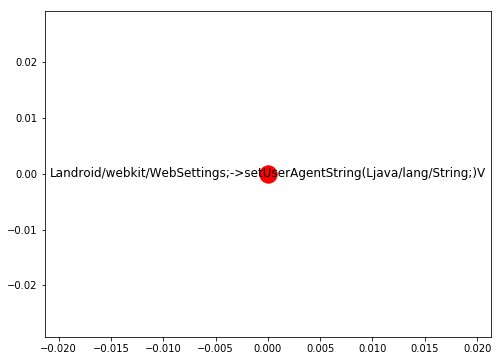

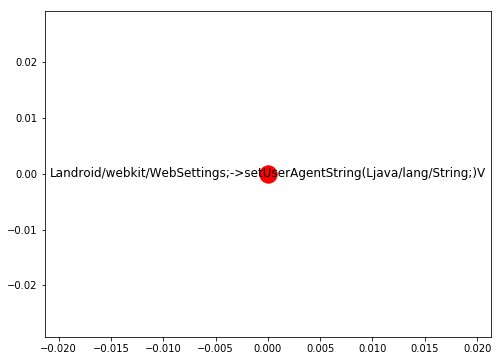

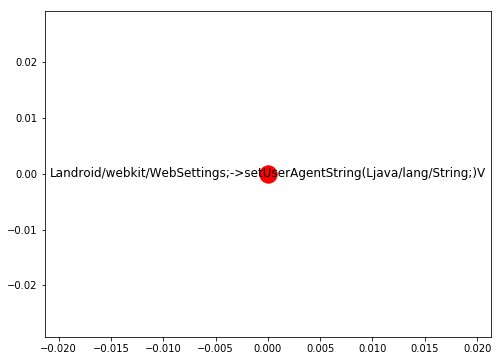

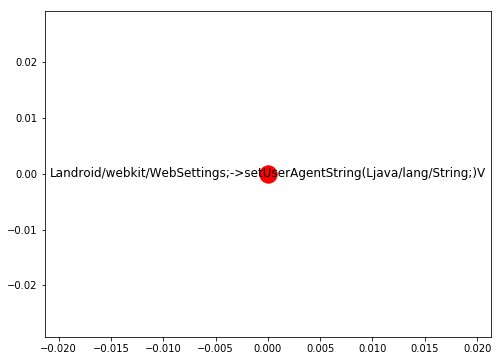

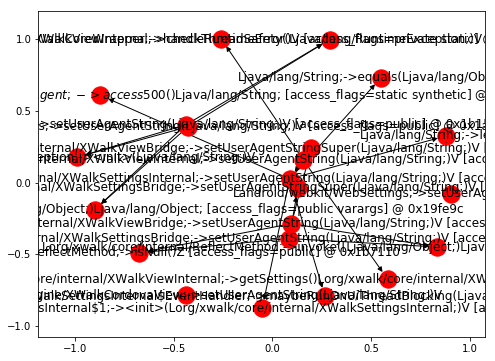

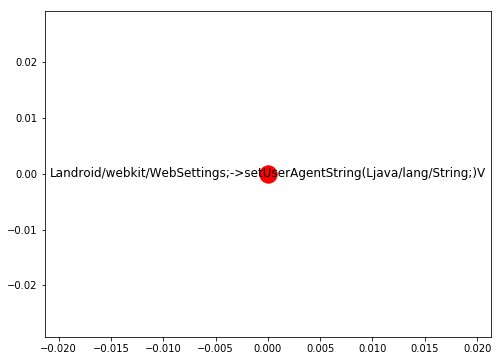

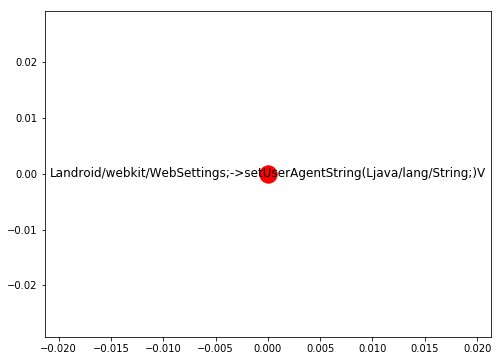

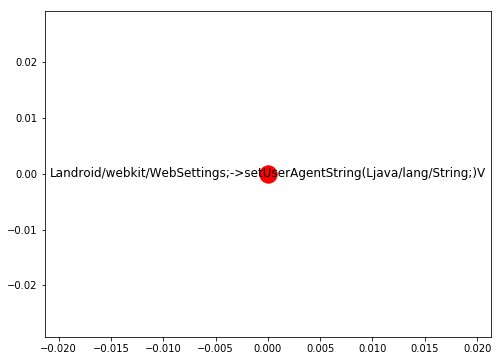

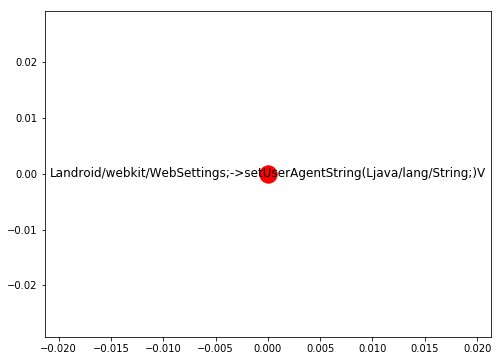

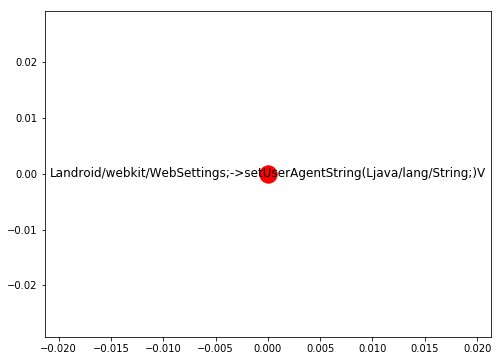

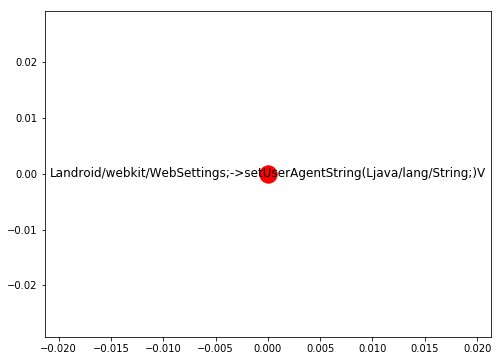

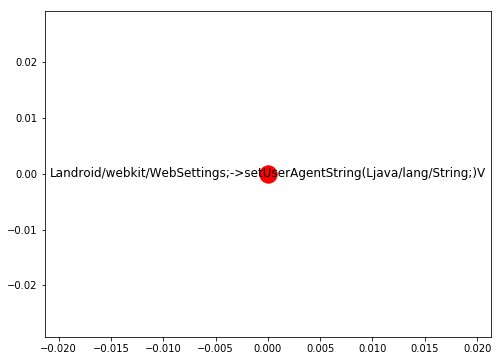

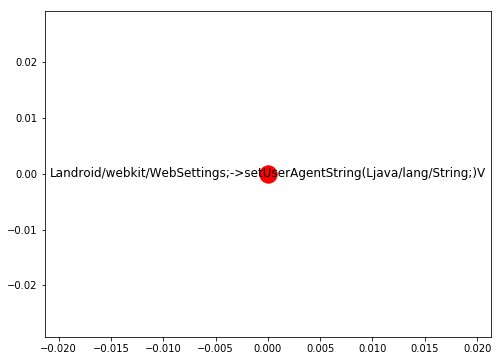

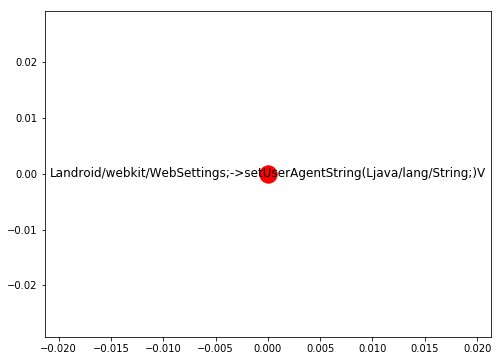

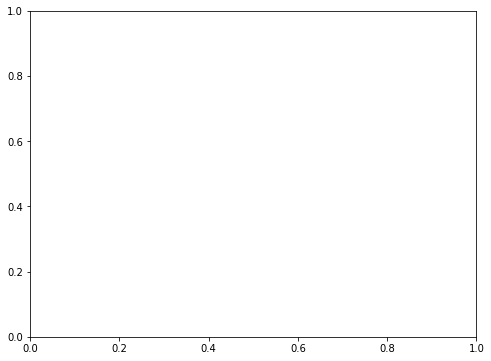

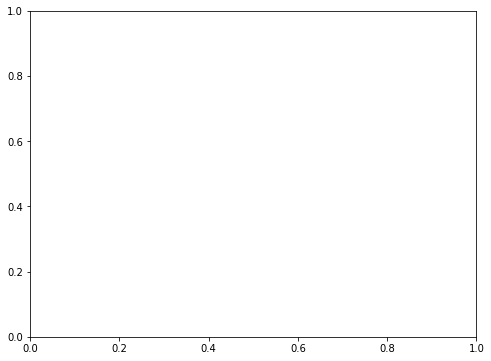

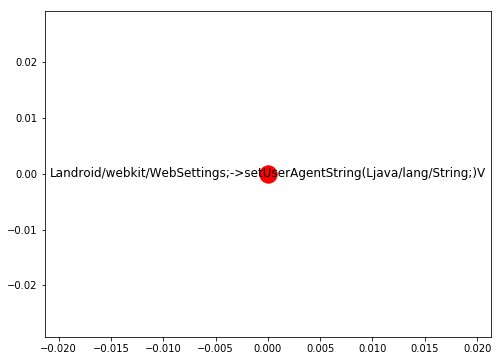

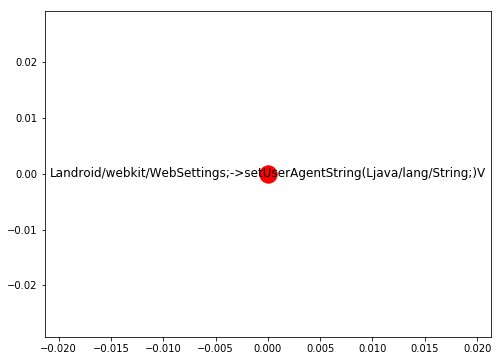

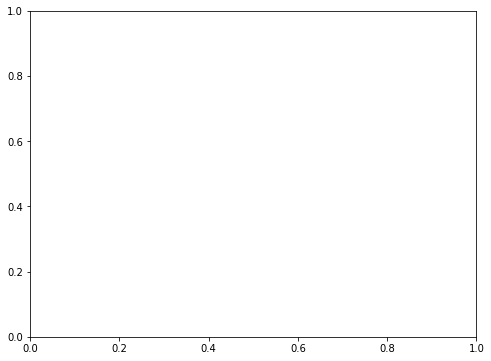

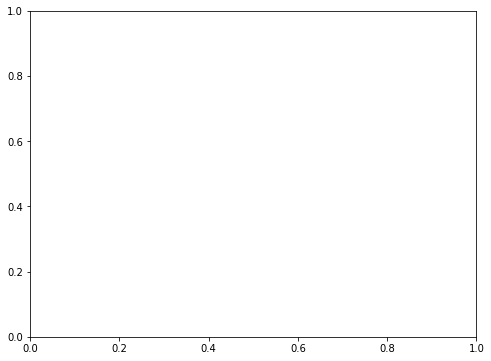

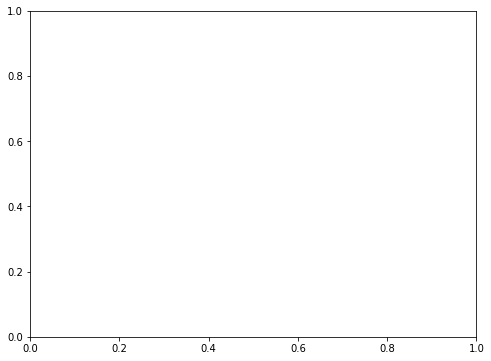

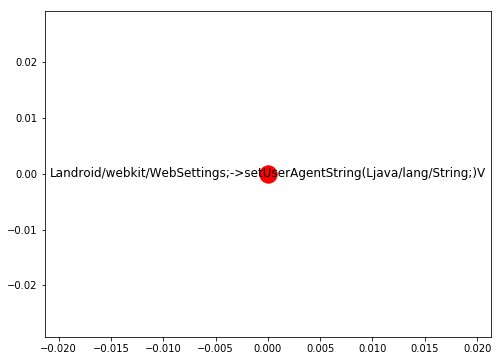

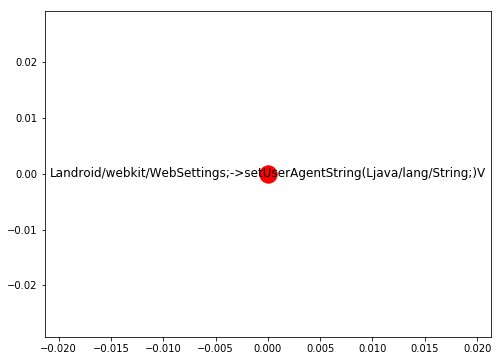

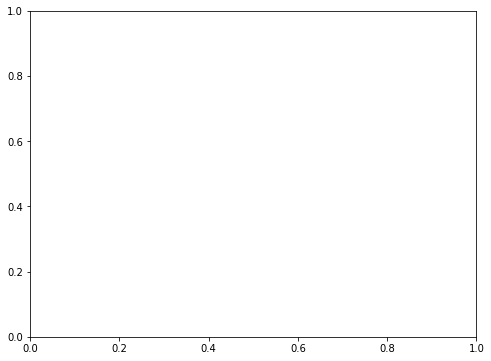

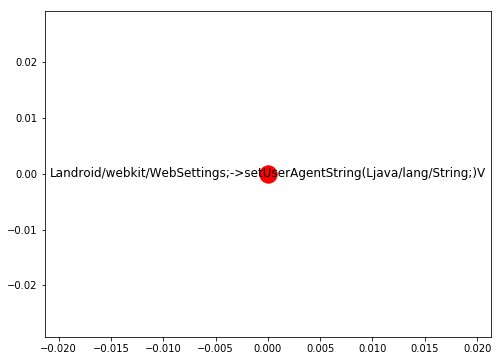

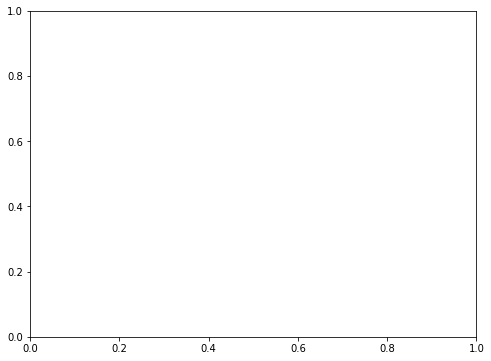

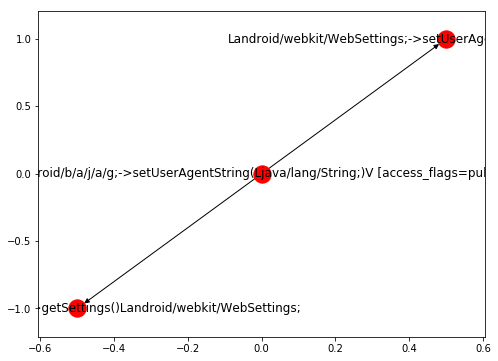

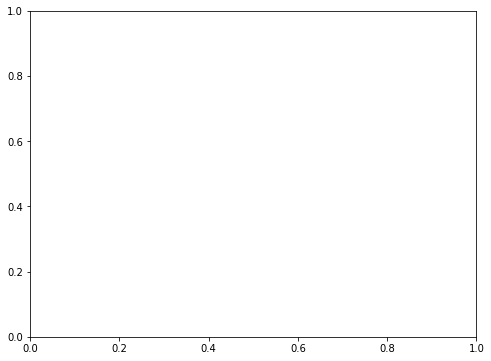

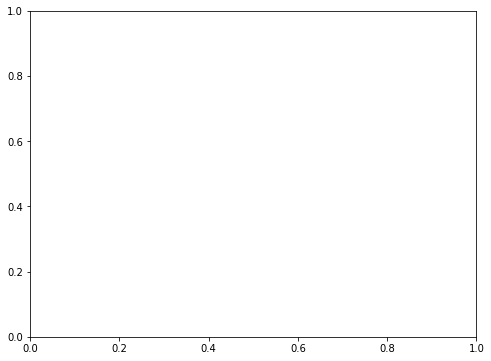

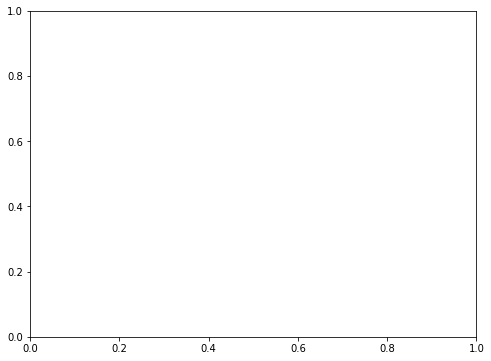

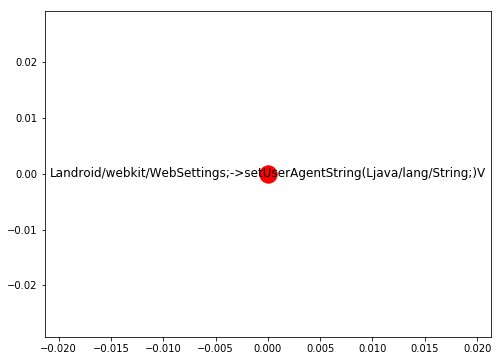

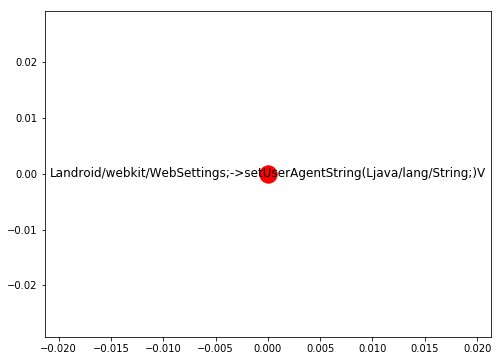

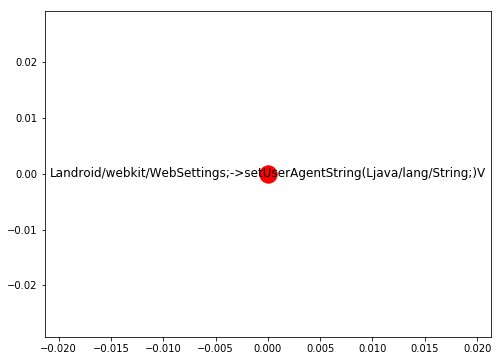

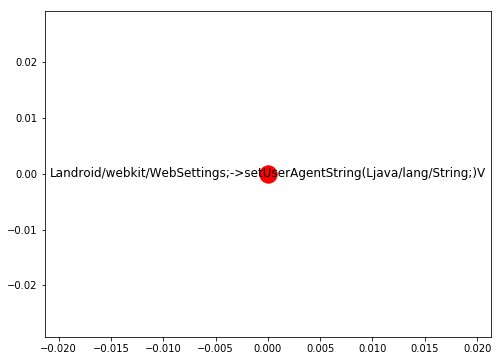

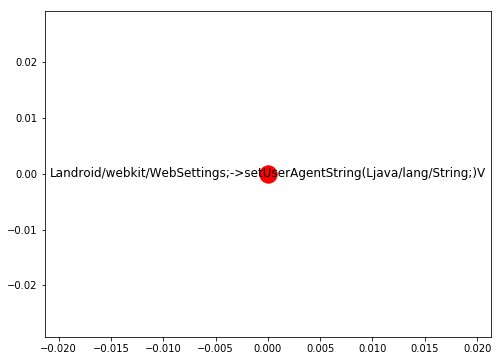

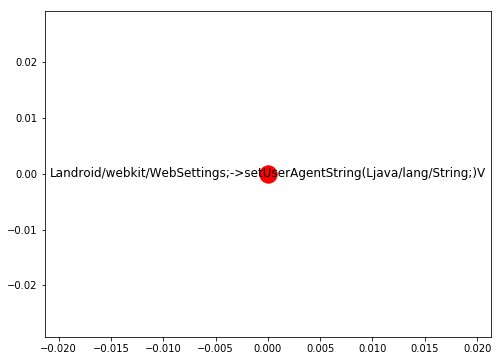

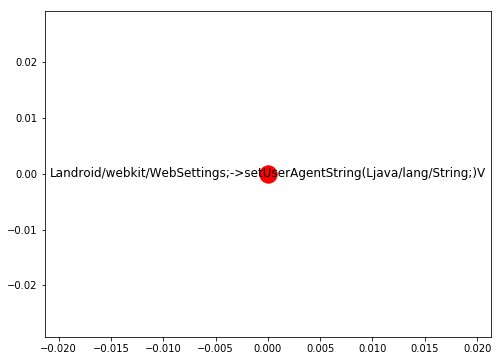

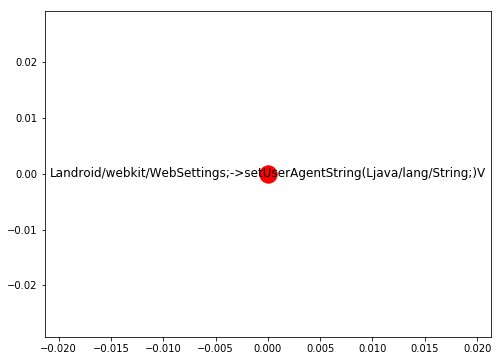

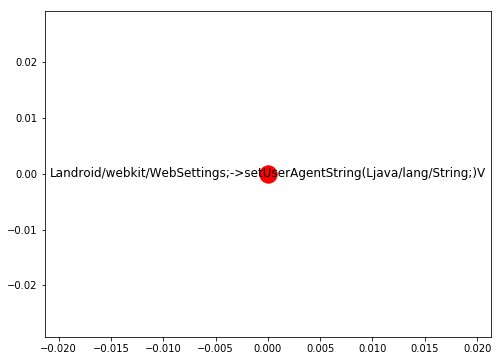

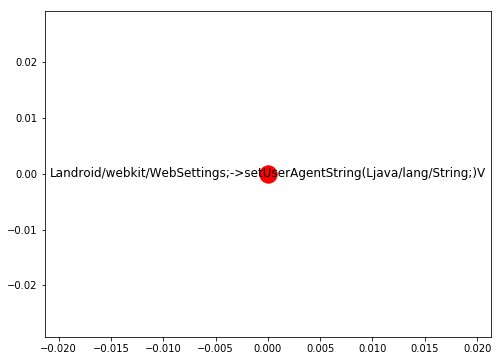

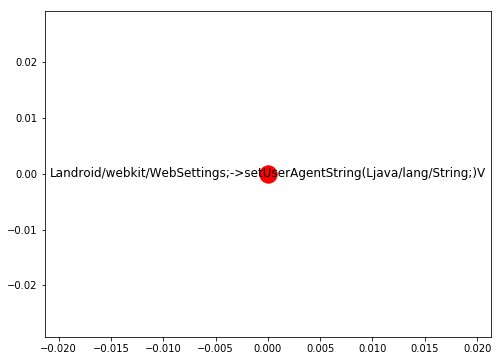

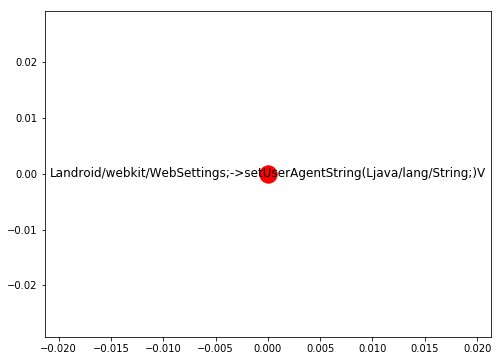

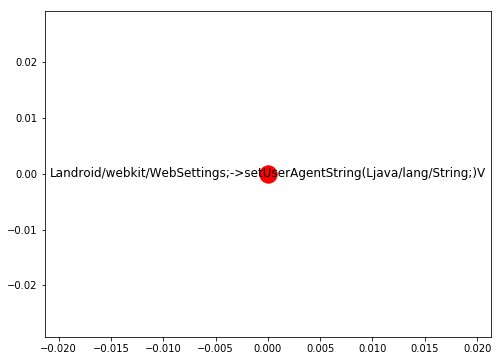

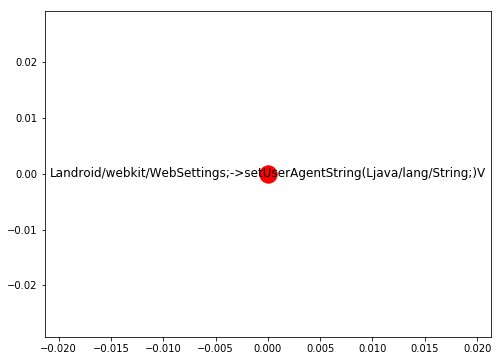

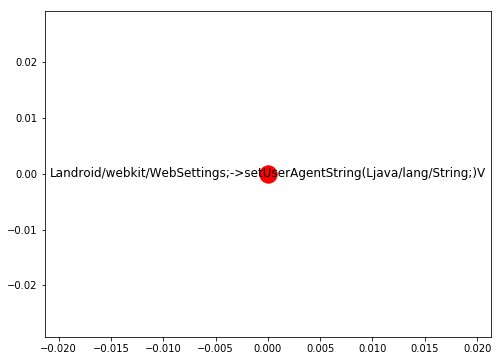

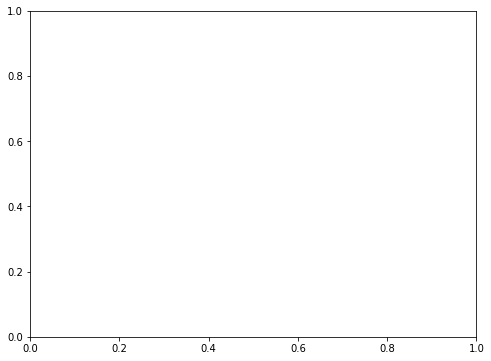

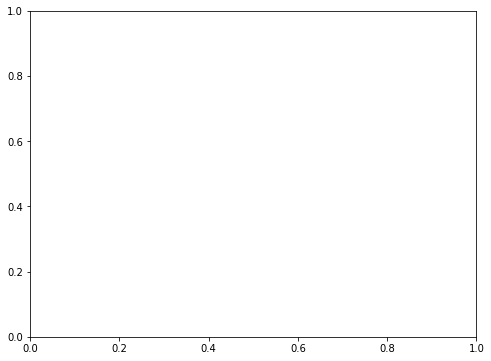

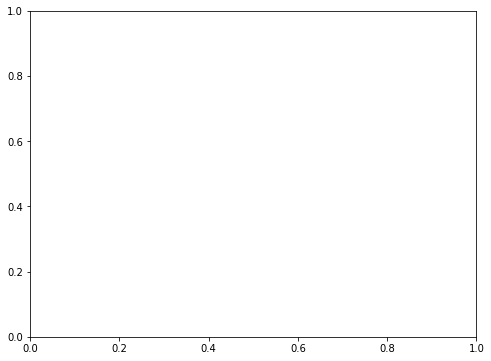

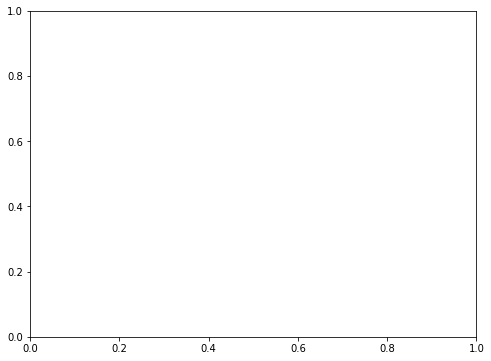

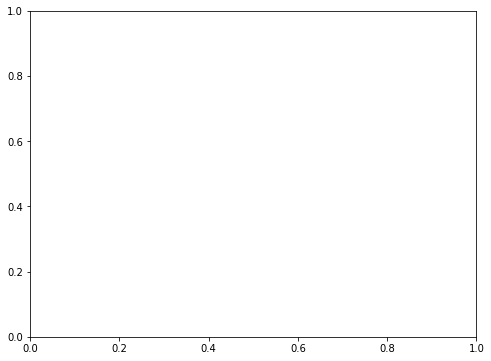

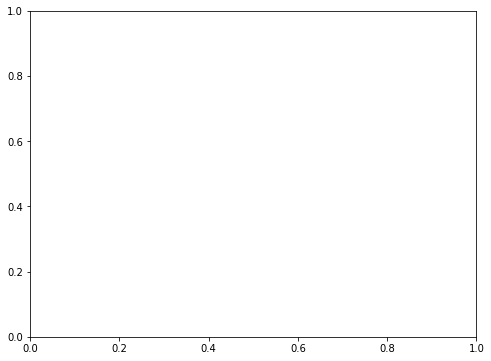

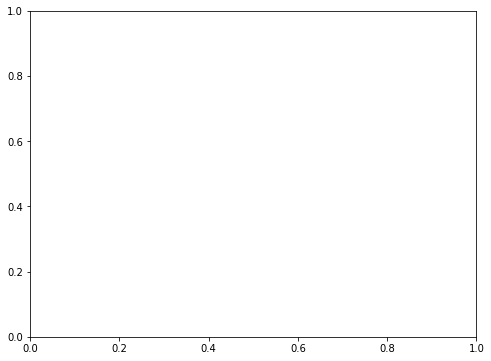

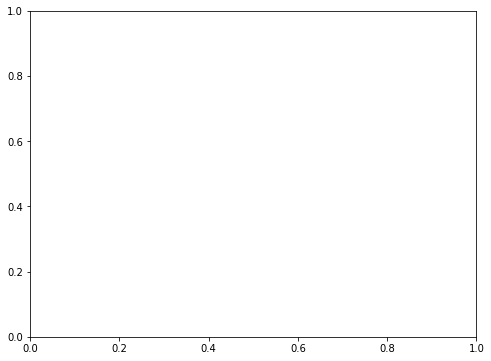

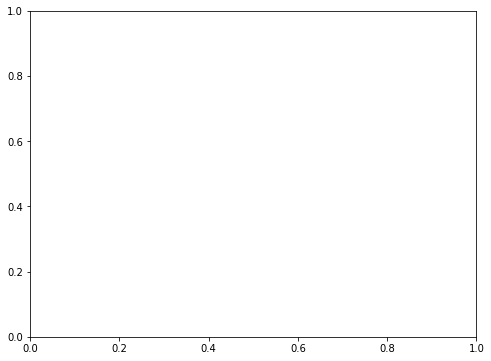

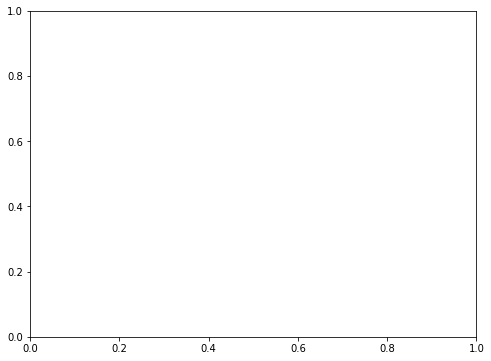

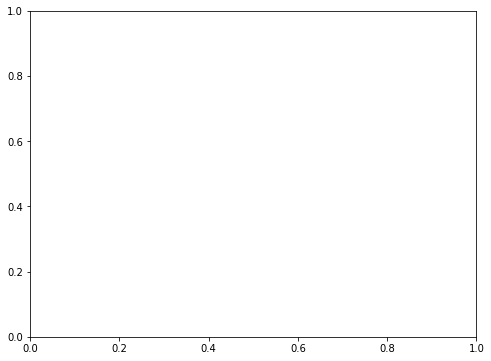

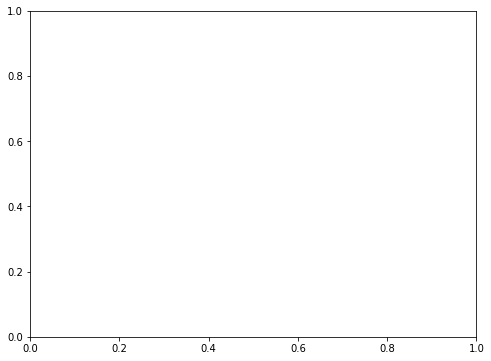

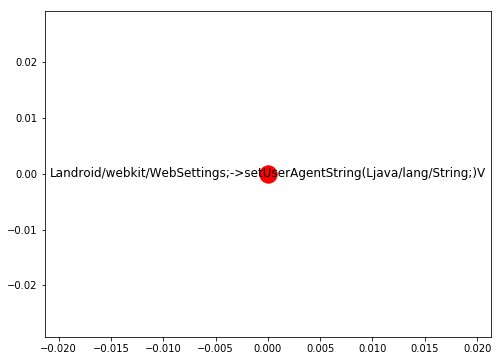

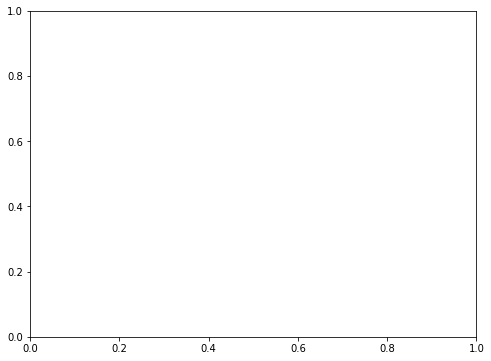

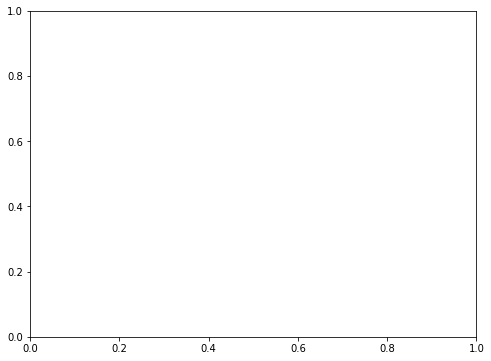

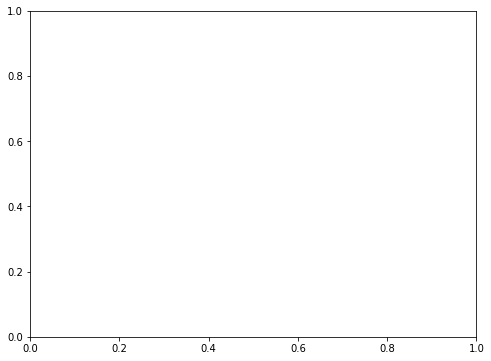

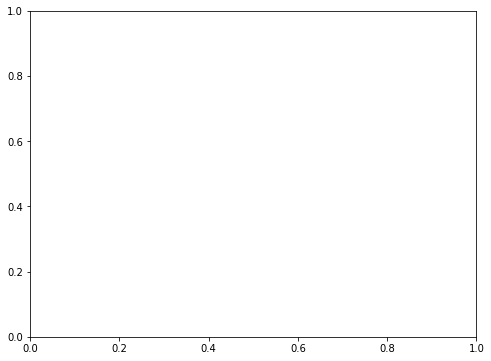

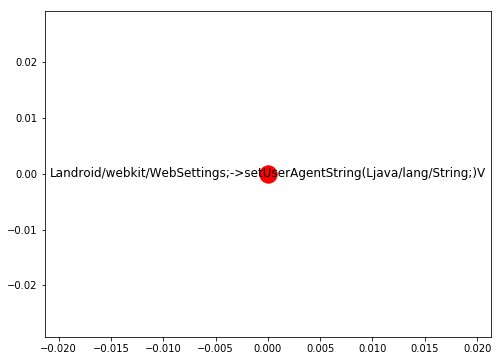

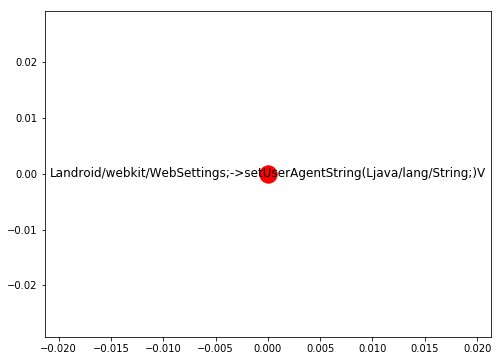

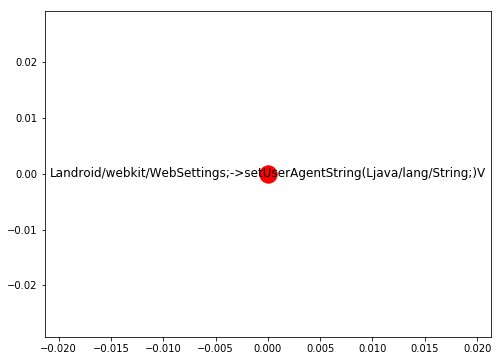

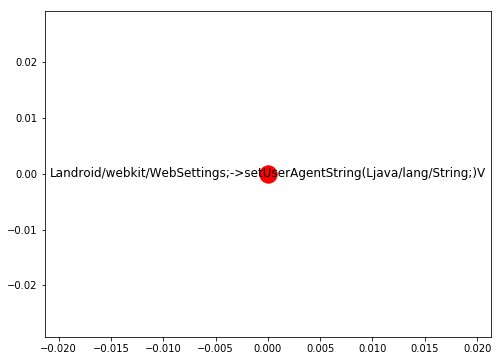

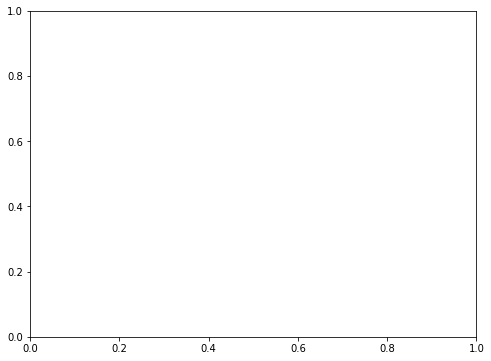

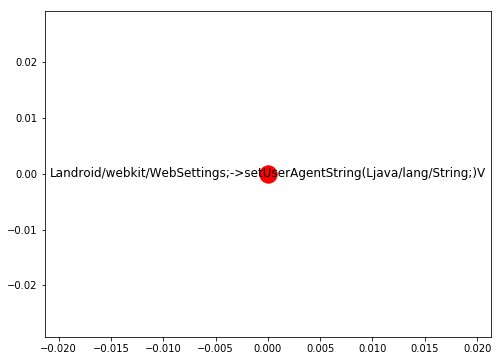

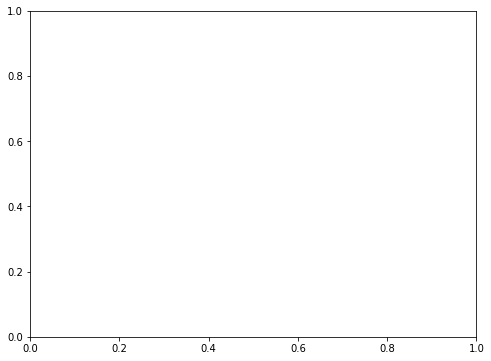

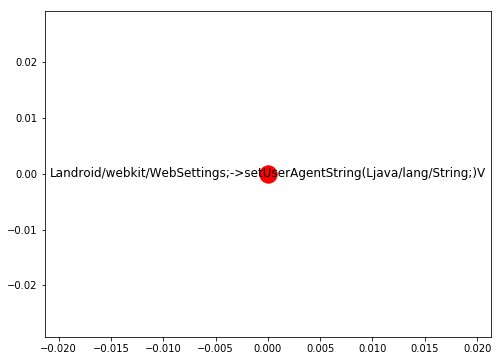

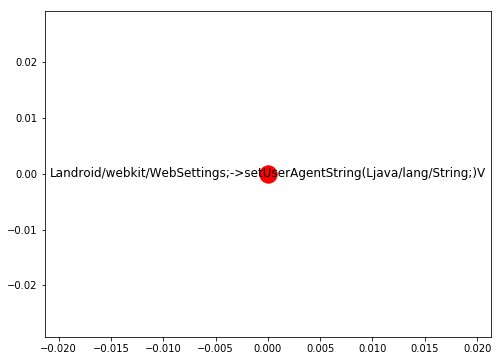

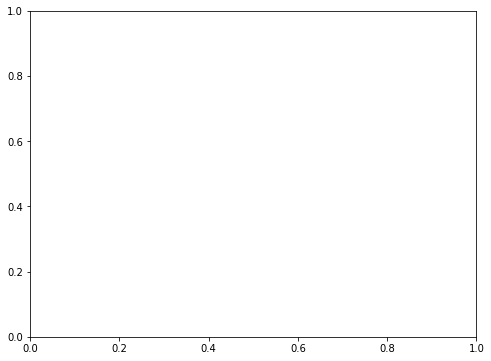

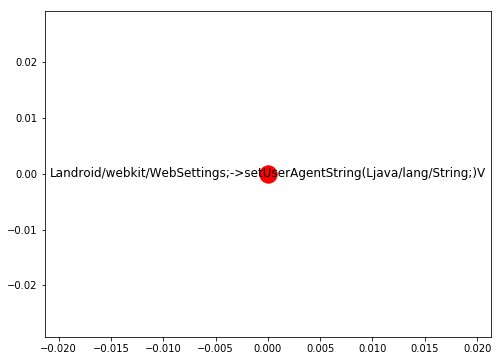

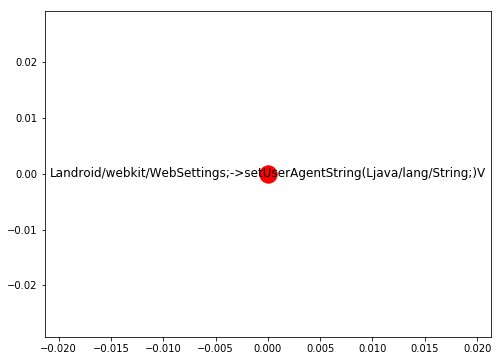

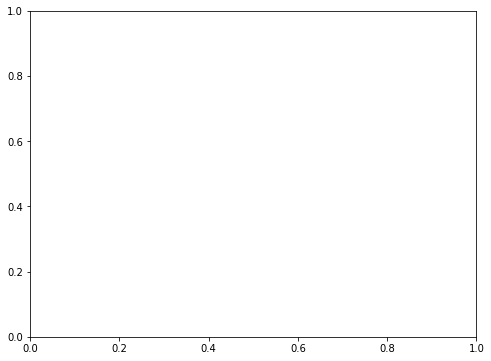

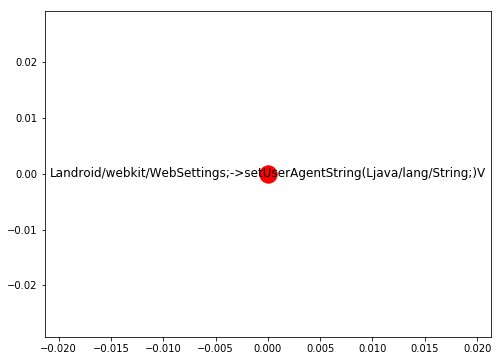

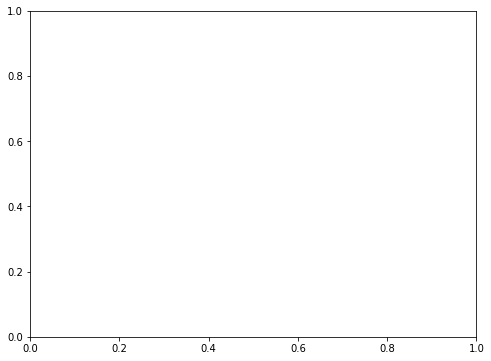

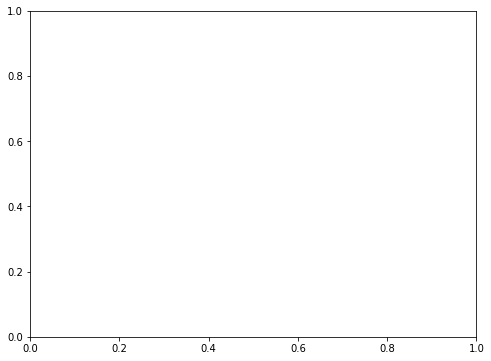

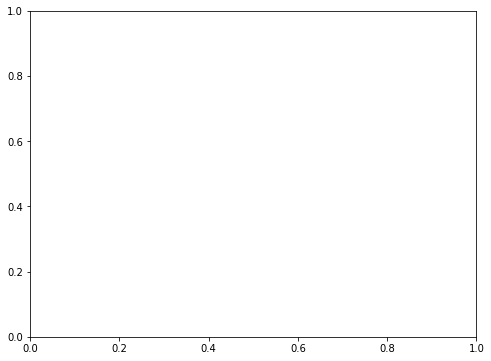

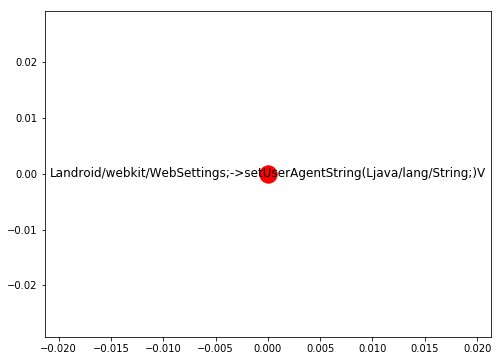

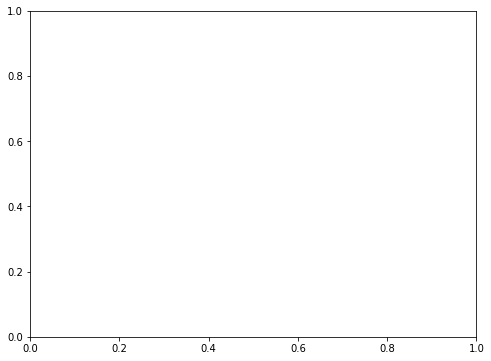

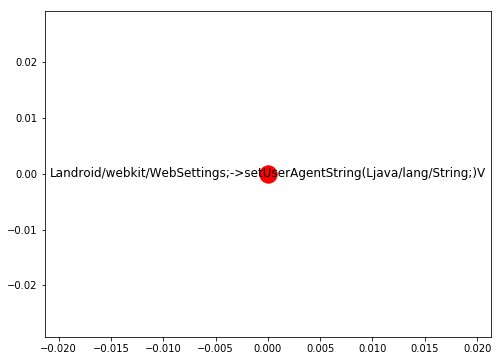

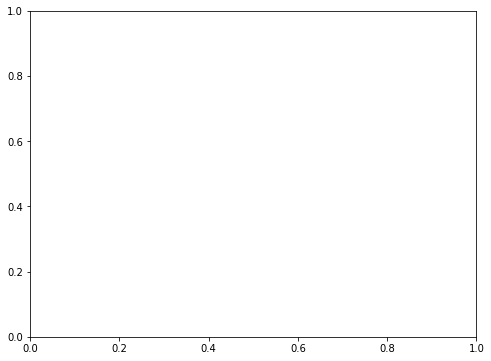

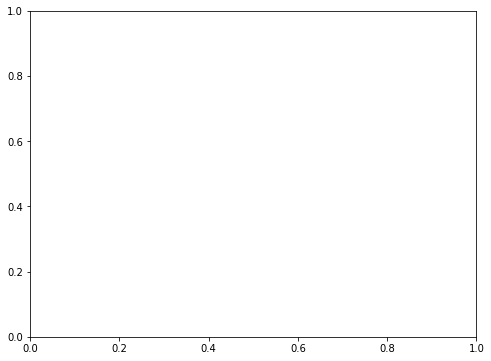

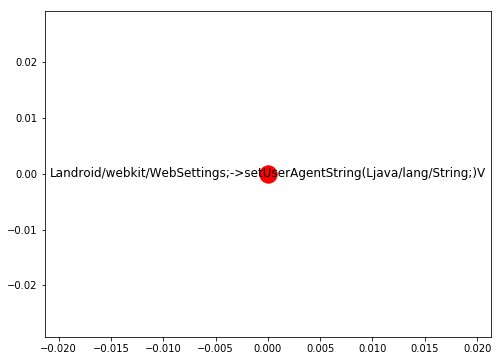

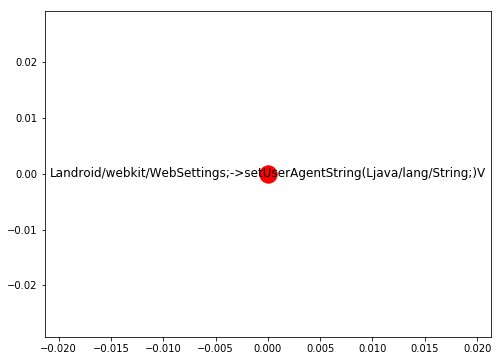

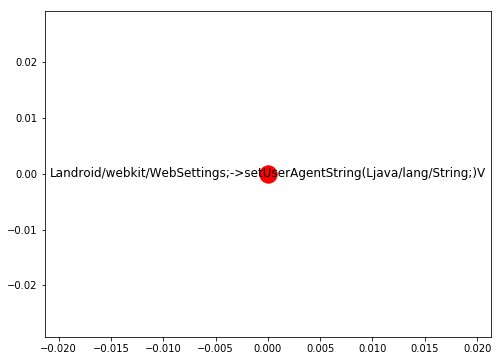

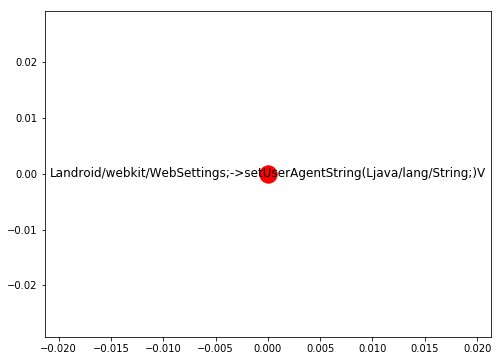

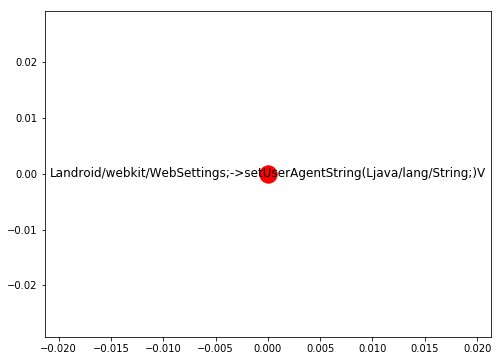

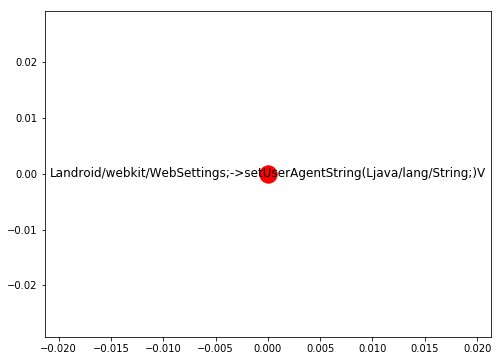

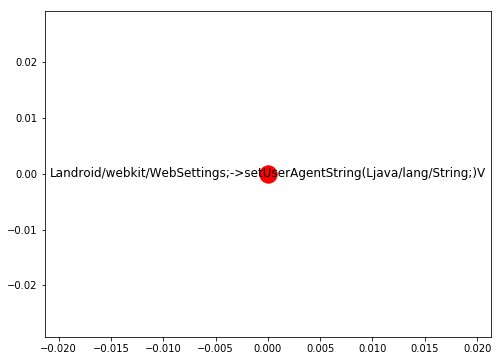

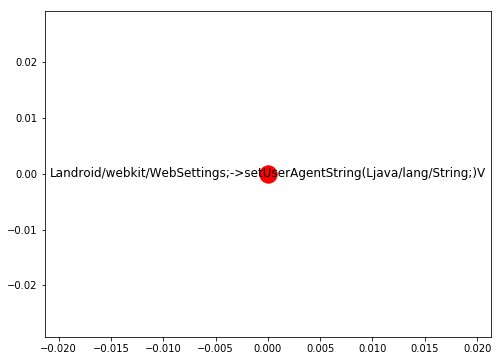

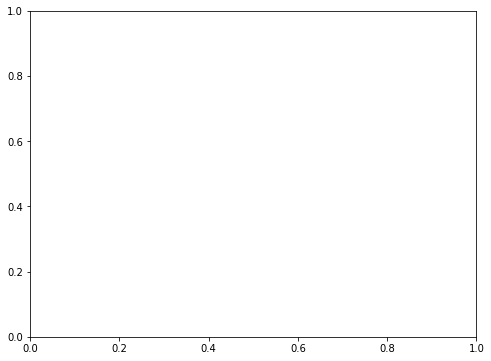

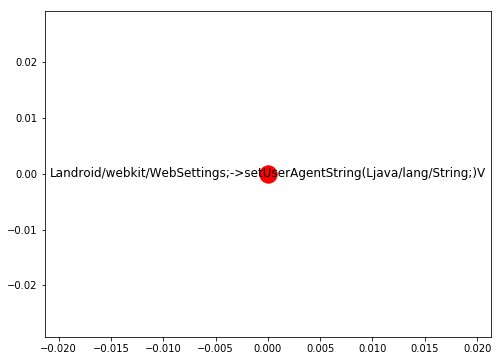

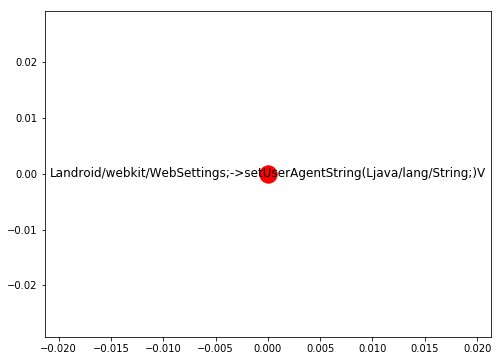

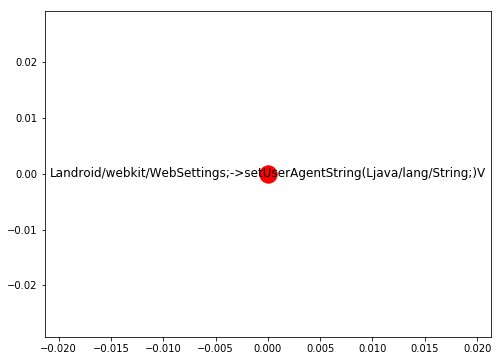

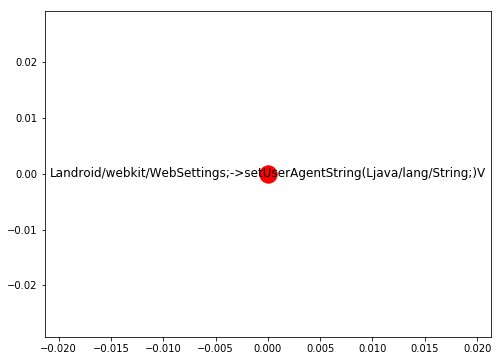

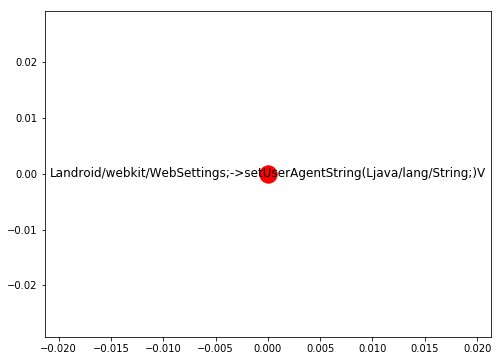

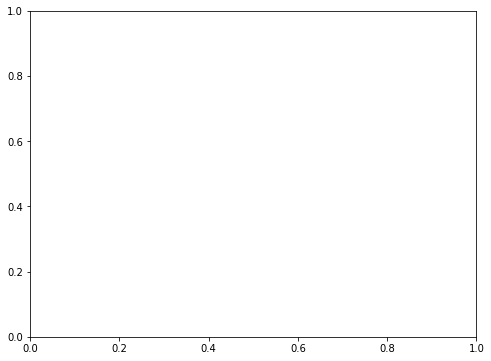

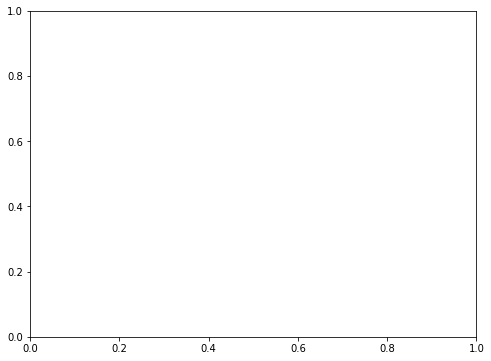

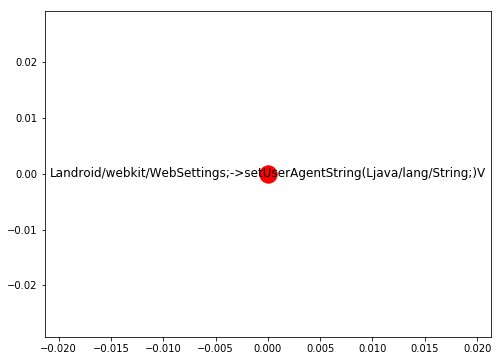

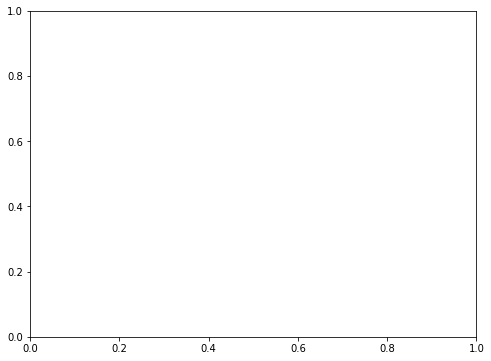

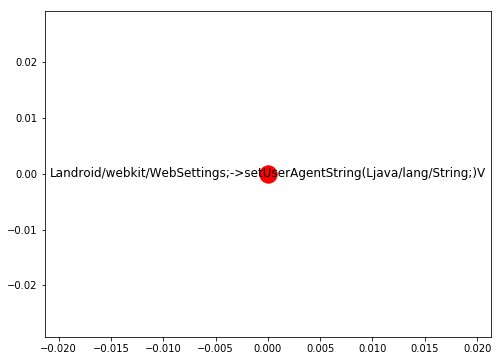

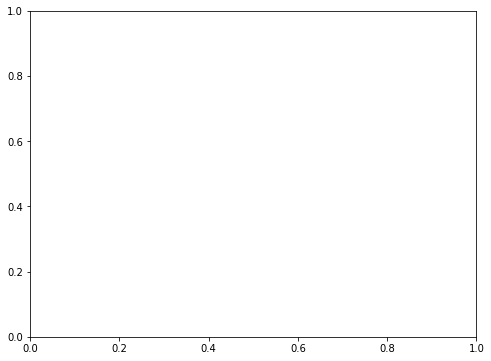

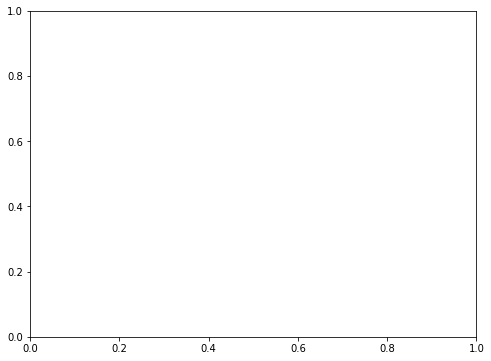

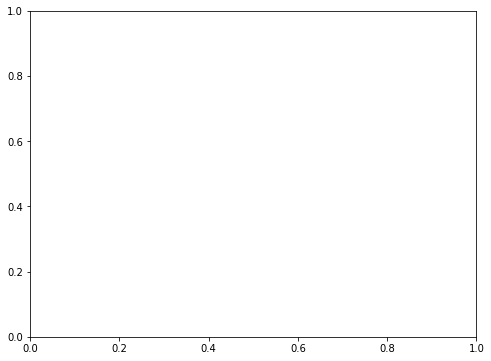

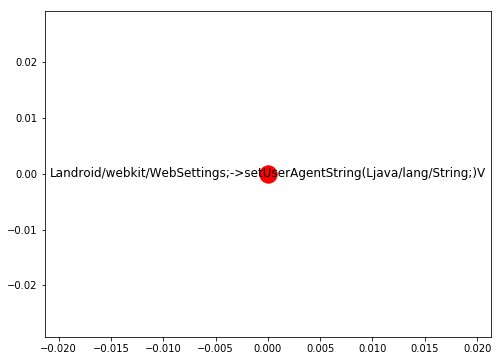

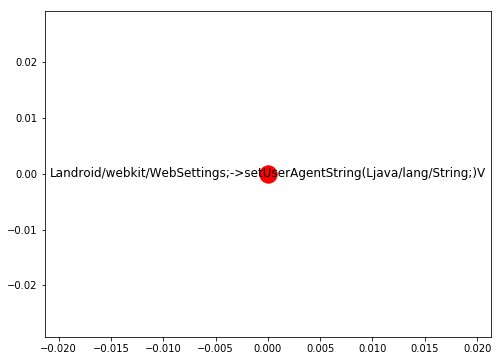

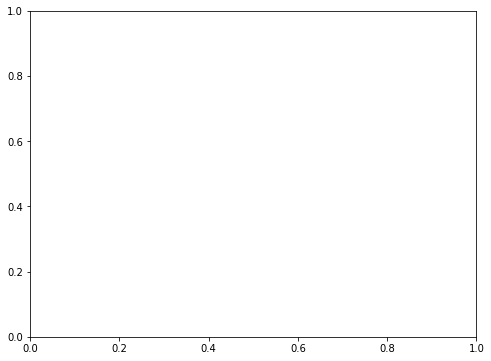

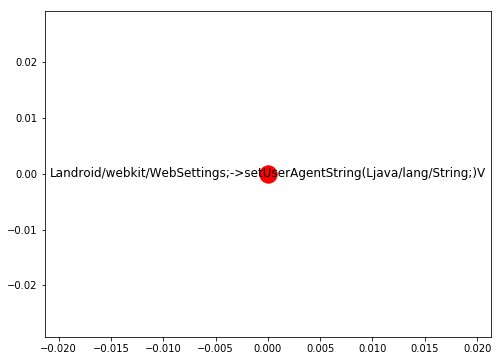

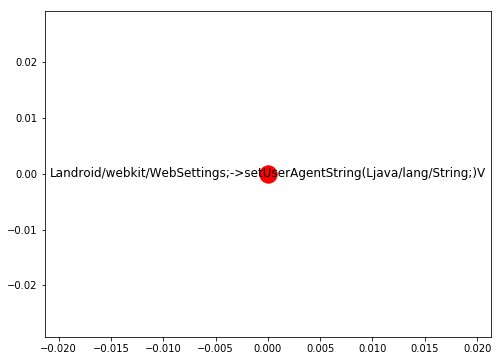

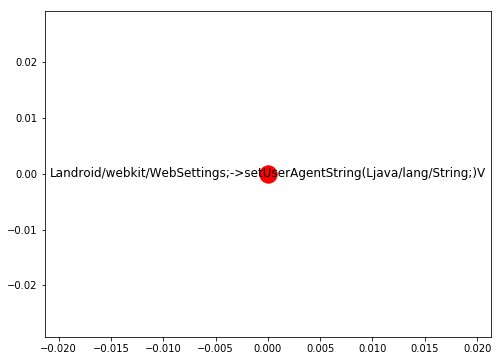

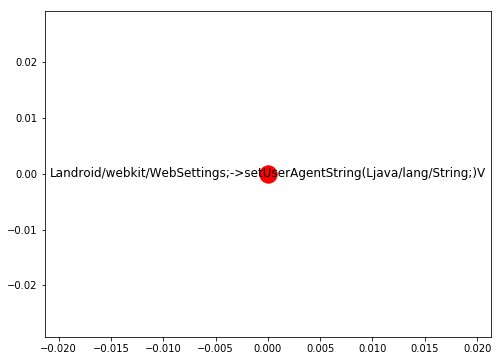

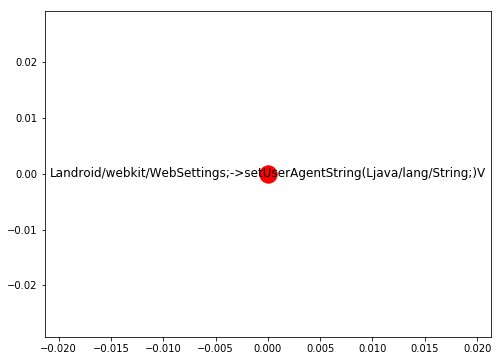

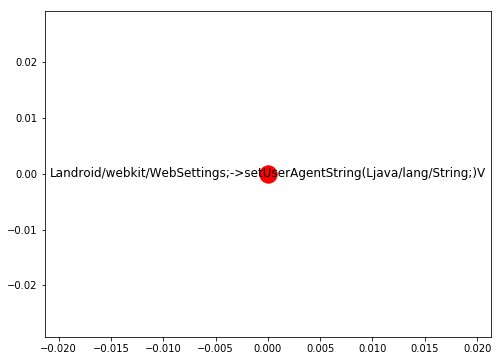

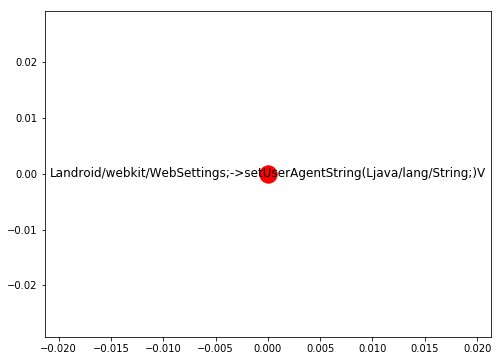

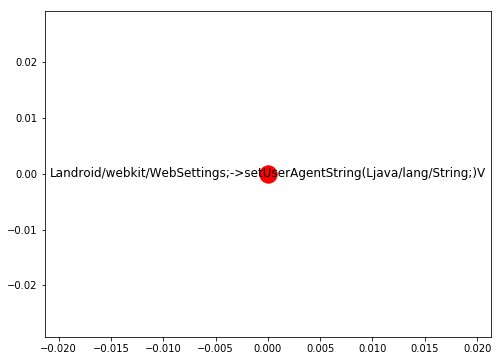

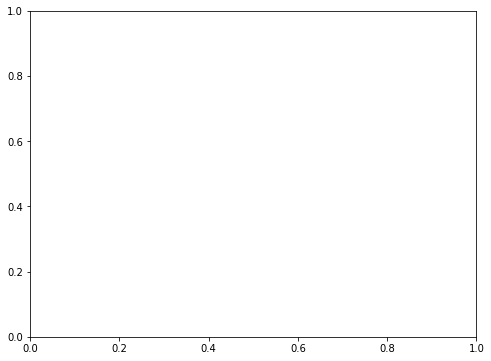

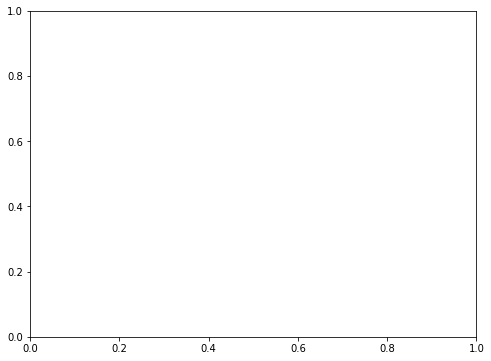

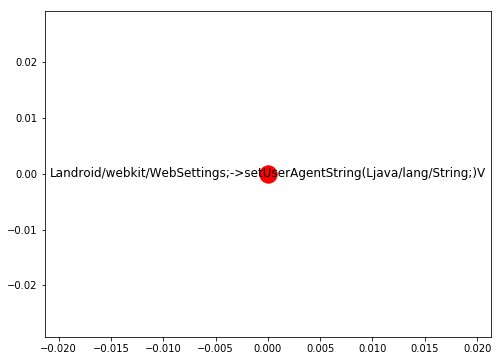

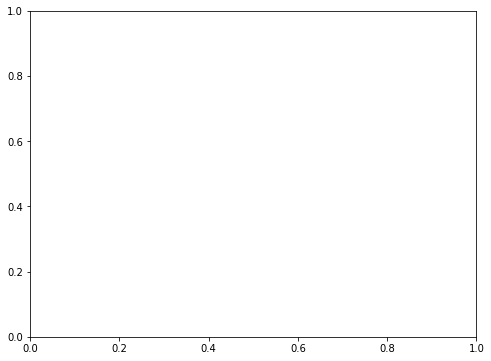

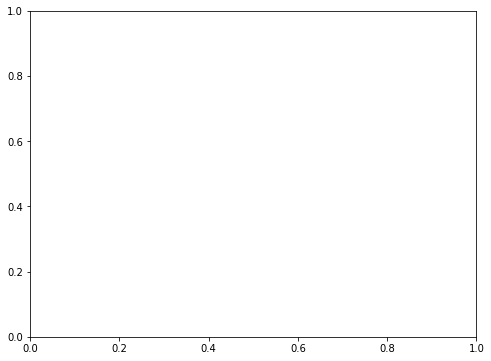

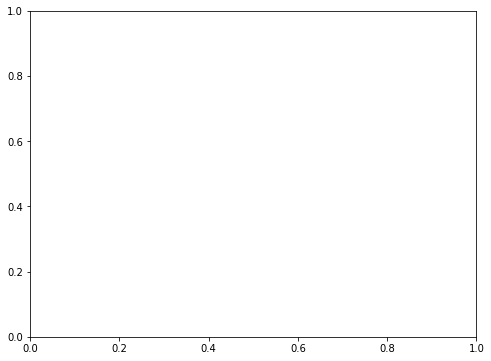

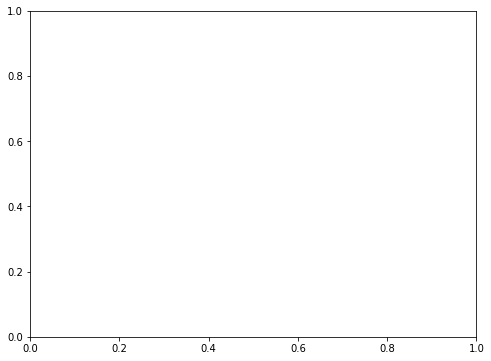

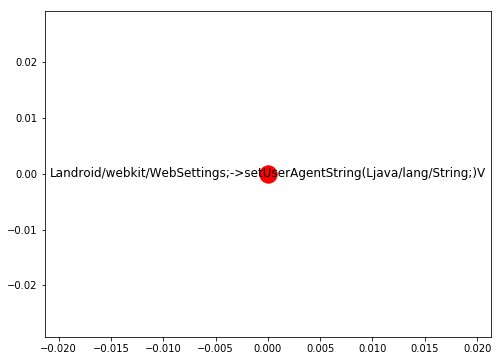

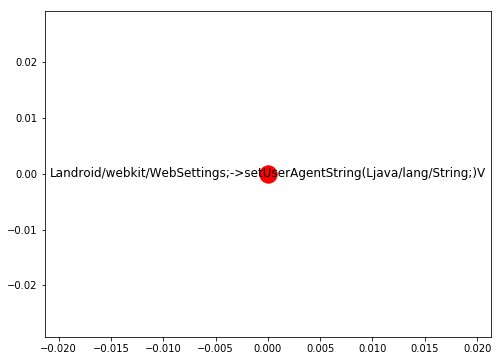

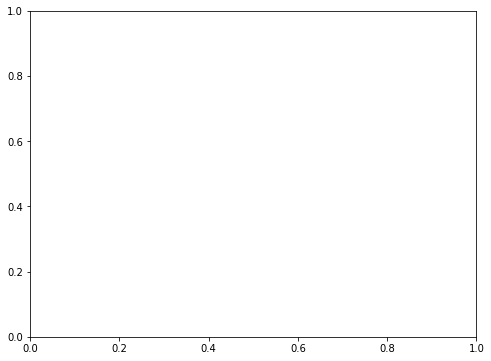

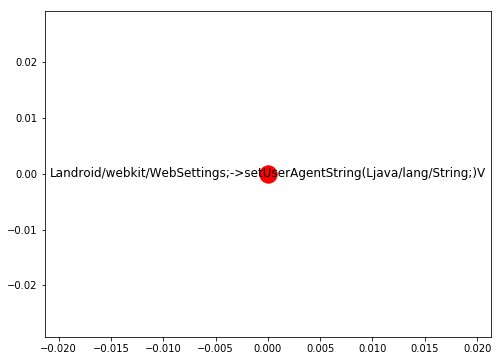

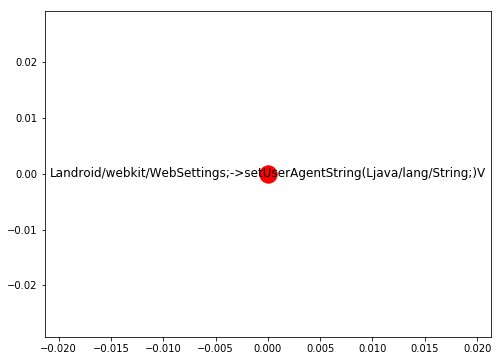

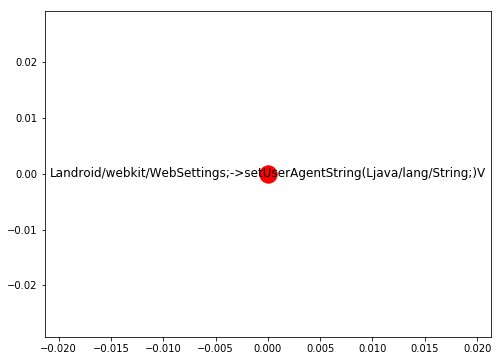

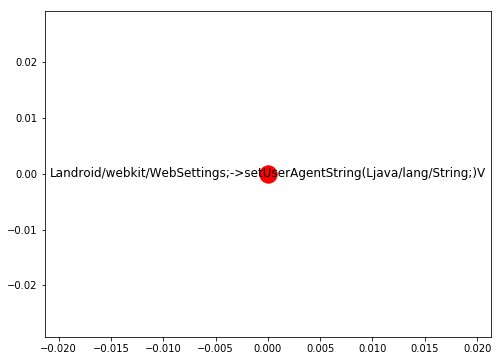

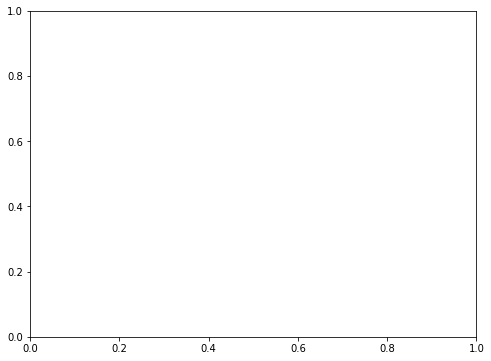

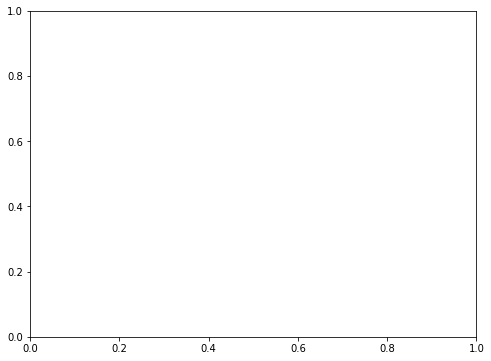

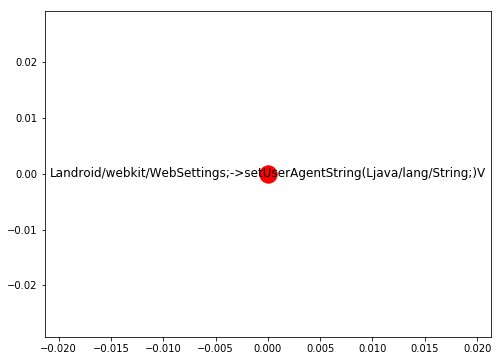

In [216]:
#block that draws call-tree 
from networkx import nx
from networkx import MultiDiGraph
import matplotlib.pyplot as plt

 
cnt = 0
for apk in apks:
    cnt+=1
    if(useSes):
        a, d, dx = s.get_objects_apk(filename = apk)
    else:
        a, d, dx = misc.AnalyzeAPK(apk)            
    plt.figure(cnt, figsize=(8, 6))
    cg = dx.get_call_graph(methodname='setUserAgentString')    
    cg.name = apk
    print(nx.info(cg))
    pos = nx.spring_layout(cg) # circular_layout random_layout shell_layout spring_layout spectral_layout    
    nx.draw_networkx(cg)     
    
    
plt.show()    
